In [1]:
import pandas as pd
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
data = pd.read_excel('dataset_Сатдинова.xlsx')

In [203]:
pip install stargazer


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
data.head(100)

,procedural_fairness,group,econ_attitude,ideology,gender,age,educ,income_level,location,result_fairness,result_interest,parliament_decision,procedure_type,public_parliament_agreement
0,6,1,1,4,2,26,3,3,3,6,7,1,0,0
1,5,1,4,4,2,29,5,4,4,3,3,1,0,0
2,7,1,4,5,2,36,2,3,2,7,7,1,0,0
3,3,1,6,5,1,27,5,4,2,3,3,1,0,0
4,6,1,2,1,1,52,5,3,4,4,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,0,5,5,1,42,2,3,4,6,3,0,0,0
96,2,0,3,4,1,43,4,4,1,2,2,0,0,0
97,5,0,4,4,1,51,5,3,5,2,3,0,0,0
98,4,0,1,4,2,37,5,4,2,4,4,0,0,0


### зависимые переменные:  

* procedural_fairness: 
процедурная справедливость - шкала от 1 до 7 (от совершенно несправедливо до совершенно справедливо)  

*  result_fairness
справедливость результата - шкала от 1 до 7 (от совершенно несправедливо до совершенно справедливо) 

*  result_interest
насколько принятое решение соответствует вашим интересам? - от 1 до 7 (от совершенно не соответствует до скорее соответствует)

### контрольные переменные:  
*   group: 0-9  
0 и 1 - контрольные группы (стандартная парламентская процедура без включения демократических инноваций), 0 - закон не принят, 1 - закон принят  
2, 3, 4, 5: deliberation treatment ('День обсуждения' + присутствие экспертов + метод жребия из всех + решение парламента нельзя пересмотреть) - ранжирование по - граждане проголосовали за/против введения закона + депутаты за/против закона (например, 2 экспериментальная група +/+, 3гр +/-, 4гр -/+, 5 гр -/-)  
6, 7, 8, 9: agonistic treatment ('День политических дебатов' + отсутствие экспертов + метод жребия из конфликтных групп + решения парламента можно пересмотреть) - ранжирование по - граждане проголосовали за/против введения закона + депутаты за/против закона (например, 6 экспериментальная група +/+, 7гр +/-, 8гр -/+, 9-/-)

*  procedure_type (0-2):
0 - контрольная группа 1 + контрольная группа 2 
1 - делиберативный treatment
2 - агонистический treatment

*   parliament_decision (0 и 1):
0 - закон не принят парламентом 
1 - закон принят парламентом 

*  public_parliament_agreement (когда согласуется мнение и депутатов и граждан):
0 - не согласовано 
1 - согласовано 

*   ideology (от 1 до 7):
Этот вопрос измеряет приоритет респондента между индивидуальными интересами и общественным благом по шкале семантического дифференциала.
Чем ближе значение к 1, тем сильнее респондент склоняется к индивидуализму. Чем ближе к 7, тем сильнее выражена ориентация на коллективизм и общественные интересы. Значение 4 указывает на нейтральную или неопределённую позицию.

*  econ_attitude (от 1 до 7):
Респонденту предлагалось выбрать, какая экономическая система ему ближе — плановая (с госрегулированием) или рыночная (с частной собственностью). Чем ближе значение к 1, тем выше ориентация респондента на этатизм и государственное вмешательство.
Чем ближе к 7, тем сильнее выражены либеральные, рыночные экономические предпочтения.

*  gender (1 и 2):  
1 - мужчина
2 - женщина

*  income_level (от 1 до 5):
Чем выше значение, тем выше уровень экономического комфорта и благосостояния по субъективной самооценке респондента.

* age - возраст

*  educ - образование (от 1 до 5):
Чем выше балл, тем выше образовательный статус респондента с точки зрения формального уровня подготовки.

*  location (от 1 до 6):
Чем выше значение, тем менее урбанизирована среда проживания, что может использоваться для анализа различий в восприятии и поведении между жителями разных типов населённых пунктов.

## Описательные статистики и проверка на нормальность распределения:

In [3]:
#распределение по полу: 1-мужчина, 2-женщина
counts = data['gender'].value_counts()
percentages = data['gender'].value_counts(normalize=True) * 100
print(counts)
print(percentages)

gender
2    288
1    246
Name: count, dtype: int64
gender
2    53.932584
1    46.067416
Name: proportion, dtype: float64


In [4]:
#расределение по возрасту
age = data['age']
age_min = age.min()
age_max = age.max()
age_mean = age.mean()
age_std = age.std()

print(f"Возраст от {age_min} до {age_max} лет (M = {age_mean:.1f} лет, SD = {age_std:.1f})")

Возраст от 18 до 64 лет (M = 36.9 лет, SD = 10.1)


In [5]:
#посмотрим количество человек в каждой группе:
counts = data['group'].value_counts()

print(f"Количество человек в каждой группе: {counts}")

#в случае одной контрольной и двух экспериментальных
cr = [0, 1] 
counts_cr = data[data['group'].isin(cr)]['group'].value_counts()

print(f"В случае одной контрольной и двух экспериментальных: {counts_cr}")

delib_group = [2, 3, 4, 5] 
counts_delib = data[data['group'].isin(delib_group)]['group'].value_counts()

print(f"В группах с делиберативной инновацией: {counts_delib}")

agonist_group = [6, 7, 8, 9]
counts_agonist = data[data['group'].isin(agonist_group)]['group'].value_counts()
print(f"В группах с агонистической инновацией: {counts_agonist}")

Количество человек в каждой группе: group
1    62
0    59
5    56
8    54
7    53
3    52
6    52
9    52
2    47
4    47
Name: count, dtype: int64
В случае одной контрольной и двух экспериментальных: group
1    62
0    59
Name: count, dtype: int64
В группах с делиберативной инновацией: group
5    56
3    52
2    47
4    47
Name: count, dtype: int64
В группах с агонистической инновацией: group
8    54
7    53
6    52
9    52
Name: count, dtype: int64


In [6]:
import pandas as pd
from scipy.stats import kstest
df = data['procedural_fairness'].dropna()

df_np = df.to_numpy().flatten()

stat, p = kstest(df_np, 'norm')

print(f'Kolmogorov-Smirnov test для переменной "procedural_fairness": stat={stat:.3f}, p={p:.3f}')
df = data['result_fairness'].dropna()

df_np = df.to_numpy().flatten()

stat, p = kstest(df_np, 'norm')

print(f'Kolmogorov-Smirnov test для переменной "result_fairness": stat={stat:.3f}, p={p:.3f}')

df = data['result_interest'].dropna()

df_np = df.to_numpy().flatten()

stat, p = kstest(df_np, 'norm')

print(f'Kolmogorov-Smirnov test для переменной "result_interest": stat={stat:.3f}, p={p:.3f}')

Kolmogorov-Smirnov test для переменной "procedural_fairness": stat=0.962, p=0.000
Kolmogorov-Smirnov test для переменной "result_fairness": stat=0.947, p=0.000
Kolmogorov-Smirnov test для переменной "result_interest": stat=0.944, p=0.000


/var/folders/p9/7xlbs77n4154cy9rhc_4cn080000gn/T/ipykernel_93423/2586187737.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


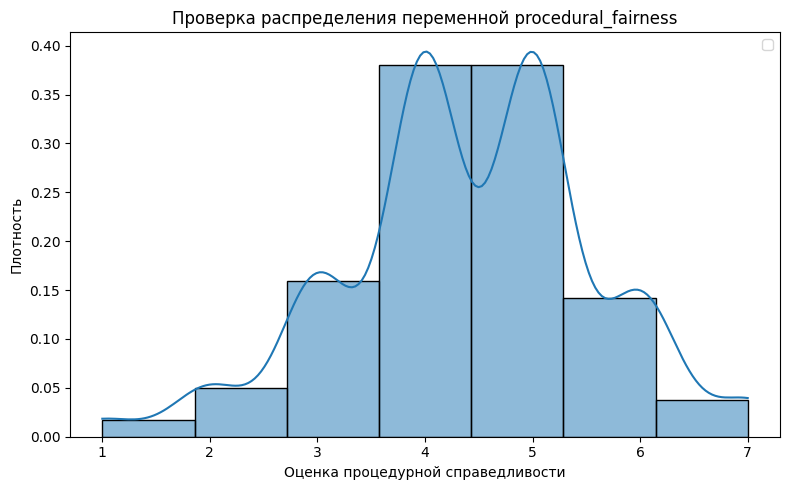

/var/folders/p9/7xlbs77n4154cy9rhc_4cn080000gn/T/ipykernel_93423/2586187737.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


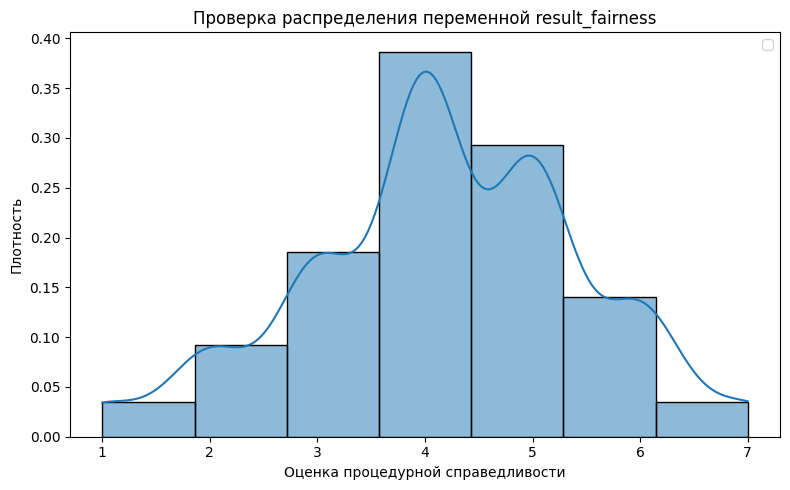

/var/folders/p9/7xlbs77n4154cy9rhc_4cn080000gn/T/ipykernel_93423/2586187737.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


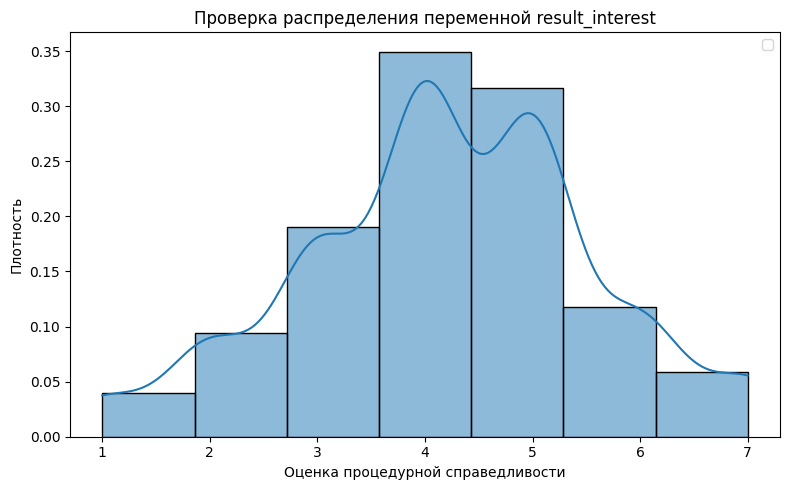

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

df = data['procedural_fairness'].dropna()

plt.figure(figsize=(8, 5))
sns.histplot(df, bins=7, kde=True, stat="density", edgecolor='black')
mean = df.mean()
std = df.std()

plt.title('Проверка распределения переменной procedural_fairness')
plt.xlabel('Оценка процедурной справедливости')
plt.ylabel('Плотность')
plt.savefig("hist_plot_proced_fairness.png", dpi=300) 

plt.legend()
plt.tight_layout()
plt.show()

df = data['result_fairness'].dropna()
plt.figure(figsize=(8, 5))
sns.histplot(df, bins=7, kde=True, stat="density", edgecolor='black')
mean = df.mean()
std = df.std()
x = np.linspace(df.min(), df.max(), 100)

plt.title('Проверка распределения переменной result_fairness')
plt.xlabel('Оценка процедурной справедливости')
plt.ylabel('Плотность')
plt.savefig("hist_plot_result_fairness.png", dpi=300) 
plt.legend()
plt.tight_layout()
plt.show()

df = data['result_interest'].dropna()
plt.figure(figsize=(8, 5))
sns.histplot(df, bins=7, kde=True, stat="density", edgecolor='black')
mean = df.mean()
std = df.std()

plt.title('Проверка распределения переменной result_interest')
plt.xlabel('Оценка процедурной справедливости')
plt.ylabel('Плотность')
plt.savefig("hist_plot_res_interest.png", dpi=300) 
plt.legend()
plt.tight_layout()
plt.show()

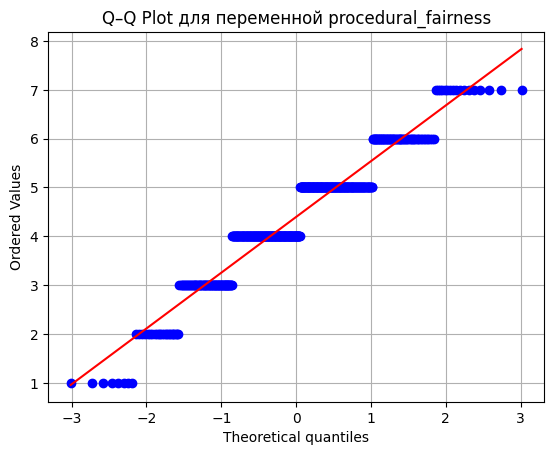

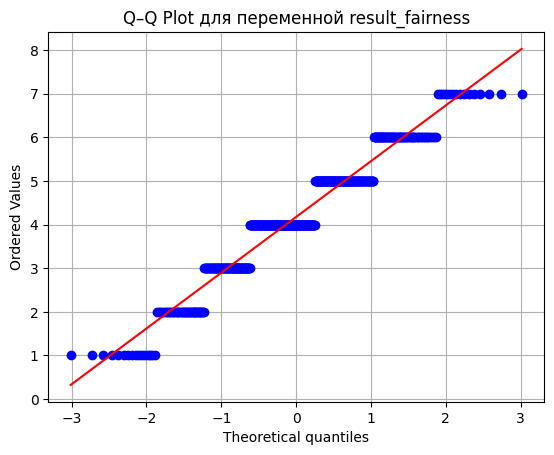

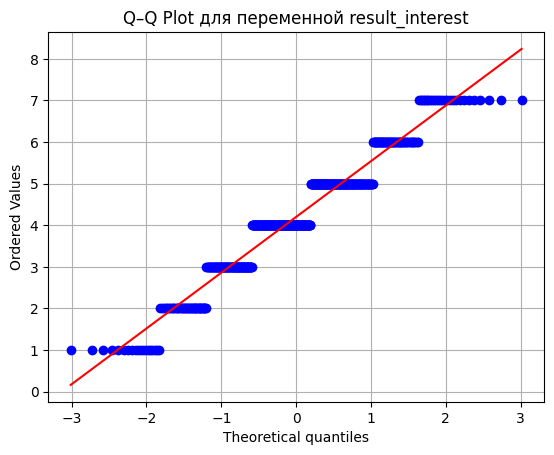

In [180]:
df = data['procedural_fairness'].dropna()
stats.probplot(df, dist="norm", plot=plt)
plt.title("Q–Q Plot для переменной procedural_fairness")
plt.grid(True)
plt.savefig("qq_procedural_fairness.png", dpi=300) 
plt.show()

df = data['result_fairness'].dropna()
stats.probplot(df, dist="norm", plot=plt)
plt.title("Q–Q Plot для переменной result_fairness")
plt.grid(True)
plt.savefig("qq_result_fairness.png", dpi=300) 
plt.show()

df = data['result_interest'].dropna()
stats.probplot(df, dist="norm", plot=plt)
plt.title("Q–Q Plot для переменной result_interest")
plt.grid(True)
plt.savefig("result_interest.png", dpi=300) 
plt.show()

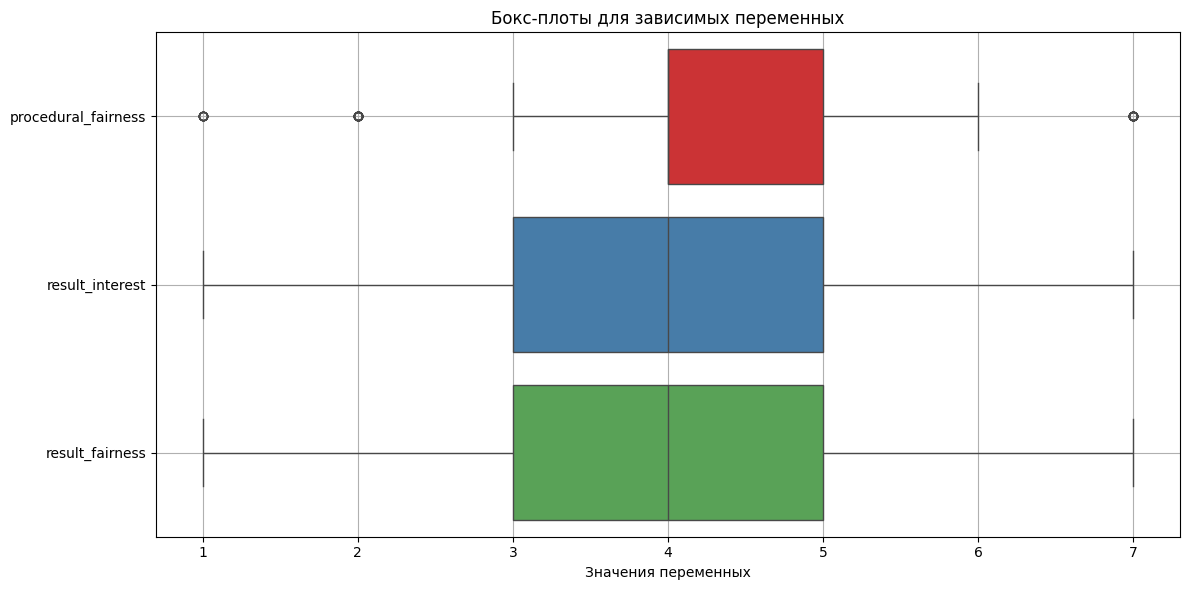

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dependent_vars = ['procedural_fairness', 'result_interest', 'result_fairness']

plt.figure(figsize=(12, 6))  # размер графика
sns.boxplot(data=data[dependent_vars], orient='h', palette='Set1')
plt.savefig("box_plot_fairness.png", dpi=400) 

plt.title('Бокс-плоты для зависимых переменных')
plt.xlabel('Значения переменных')
plt.grid(True)
plt.tight_layout()
plt.show()

Распределение отличается от нормального. Тем не менее, регрессия все еще работает, так как важна нормальность распределения остатков.

## ATE, t-tests, Манн-Уитни

ATE и t-tests для проверки гипотезы о равенстве средних между контрольными группами и группами с делиберативным типом демократических инноваций

In [163]:
from scipy.stats import ttest_ind
group_treatment1 = data[data['group'].isin([2,3,4,5])]['procedural_fairness']
group_control = data[data['group'].isin([0, 1])]['procedural_fairness']
ATE = group_treatment1.mean() - group_control.mean()
u_stat, wilcoxon_p = mannwhitneyu(group_treatment1, group_control, alternative='two-sided')
print(f"Average Treatment Effect (ATE): {ATE:.3f}")
print(f'W-test: {u_stat:.3f}, p_w: {wilcoxon_p:.3f}')
t_stat, p_val = ttest_ind(group_treatment1, group_control, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

Average Treatment Effect (ATE): -0.163
W-test: 11310.000, p_w: 0.244
t-statistic: -1.201, p-value: 0.231


ATE и t-tests для проверки гипотезы о равенстве средних между контрольными группами и группами с агонистическим типом демократических инноваций

In [165]:
group_treatment2 = data[data['group'].isin([6, 7, 8, 9])]['procedural_fairness']
group_control = data[data['group'].isin([0, 1])]['procedural_fairness']
ATE = group_treatment2.mean() - group_control.mean()
print(f"Average Treatment Effect (ATE): {ATE:.3f}")
u_stat, wilcoxon_p = mannwhitneyu(group_treatment2, group_control, alternative='two-sided')
print(f'W-test: {u_stat:.3f}, p_w: {wilcoxon_p:.3f}')
t_stat, p_val = ttest_ind(group_treatment2, group_control, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

Average Treatment Effect (ATE): -0.053
W-test: 12630.000, p_w: 0.868
t-statistic: -0.377, p-value: 0.706


ATE и t-tests для проверки гипотезы о равенстве средних между контрольными группами и группами с делиберативным типом демократических инноваций

In [166]:
from scipy.stats import ttest_ind
group_treatment1 = data[data['group'].isin([2,3,4,5])]['result_fairness']
group_control = data[data['group'].isin([0, 1])]['result_fairness']
ATE = group_treatment1.mean() - group_control.mean()
u_stat, wilcoxon_p = mannwhitneyu(group_treatment1, group_control, alternative='two-sided')
print(f"Average Treatment Effect (ATE): {ATE:.3f}")
print(f'W-test: {u_stat:.3f}, p_w: {wilcoxon_p:.3f}')
t_stat, p_val = ttest_ind(group_treatment1, group_control, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

Average Treatment Effect (ATE): -0.121
W-test: 11546.500, p_w: 0.393
t-statistic: -0.781, p-value: 0.436


In [167]:
group_treatment2 = data[data['group'].isin([6, 7, 8, 9])]['result_fairness']
group_control = data[data['group'].isin([0, 1])]['result_fairness']
ATE = group_treatment2.mean() - group_control.mean()
print(f"Average Treatment Effect (ATE): {ATE:.3f}")
u_stat, wilcoxon_p = mannwhitneyu(group_treatment2, group_control, alternative='two-sided')
print(f'W-test: {u_stat:.3f}, p_w: {wilcoxon_p:.3f}')
t_stat, p_val = ttest_ind(group_treatment2, group_control, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

Average Treatment Effect (ATE): 0.013
W-test: 12807.500, p_w: 0.959
t-statistic: 0.082, p-value: 0.934


In [233]:
from scipy.stats import ttest_ind
group_treatment1 = data[data['group'].isin([2,3,4,5])]['result_interest']
group_control = data[data['group'].isin([0, 1])]['result_interest']
ATE = group_treatment1.mean() - group_control.mean()
u_stat, wilcoxon_p = mannwhitneyu(group_treatment1, group_control, alternative='two-sided')
print(f"Average Treatment Effect (ATE): {ATE:.3f}")
print(f'W-test: {u_stat:.3f}, p_w: {wilcoxon_p:.3f}')
t_stat, p_val = ttest_ind(group_treatment1, group_control, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

Average Treatment Effect (ATE): -0.056
W-test: 12026.000, p_w: 0.806
t-statistic: -0.355, p-value: 0.723


In [234]:
group_treatment2 = data[data['group'].isin([6, 7, 8, 9])]['result_interest']
group_control = data[data['group'].isin([0, 1])]['result_interest']
ATE = group_treatment2.mean() - group_control.mean()
print(f"Average Treatment Effect (ATE): {ATE:.3f}")
u_stat, wilcoxon_p = mannwhitneyu(group_treatment2, group_control, alternative='two-sided')
print(f'W-test: {u_stat:.3f}, p_w: {wilcoxon_p:.3f}')
t_stat, p_val = ttest_ind(group_treatment2, group_control, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

Average Treatment Effect (ATE): 0.080
W-test: 13216.000, p_w: 0.583
t-statistic: 0.513, p-value: 0.608


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

results = {
    "Группа": ["Делиберативная", "Агонистическая"],
    "ATE": [-0.163, -0.053],
    "t-statistic": [-1.201, -0.377],
    "t-p-value": [0.231, 0.706],
    "W-statistic": [11310.0, 12630.0],
    "W-p-value": [0.244, 0.868]
}

df = pd.DataFrame(results)

latex_code = df.to_latex(index=False, float_format="%.3f")
print(latex_code)

In [235]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

results = {
    "Группа": ["Делиберативная", "Агонистическая"],
    "ATE": [-0.121, 0.013],
    "t-statistic": [-0.781, 0.082],
    "t-p-value": [0.436,  0.934],
    "W-statistic": [11546.500, 12807.500],
    "W-p-value": [0.393, 0.959]
}

df = pd.DataFrame(results)


latex_code = df.to_latex(index=False, float_format="%.3f")
print(latex_code)

\begin{tabular}{lrrrrr}
\toprule
Группа & ATE & t-statistic & t-p-value & W-statistic & W-p-value \\
\midrule
Делиберативная & -0.121 & -0.781 & 0.436 & 11546.500 & 0.393 \\
Агонистическая & 0.013 & 0.082 & 0.934 & 12807.500 & 0.959 \\
\bottomrule
\end{tabular}



In [239]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

results = {
    "Группа": ["Делиберативная", "Агонистическая"],
    "ATE": [-0.056, 0.080],
    "t-statistic": [-0.355, 0.513],
    "t-p-value": [0.723, 0.608],
    "W-statistic": [12026.000, 13216.000],
    "W-p-value": [0.806, 0.583]
}

df = pd.DataFrame(results)

latex_code = df.to_latex(index=False, float_format="%.3f")
print(latex_code)

\begin{tabular}{lrrrrr}
\toprule
Группа & ATE & t-statistic & t-p-value & W-statistic & W-p-value \\
\midrule
Делиберативная & -0.056 & -0.355 & 0.723 & 12026.000 & 0.806 \\
Агонистическая & 0.080 & 0.513 & 0.608 & 13216.000 & 0.583 \\
\bottomrule
\end{tabular}



#### Попарная проверка с каждой из 8 экспериментальных групп: за 0 - контрольная группа - закон не принят, 1 - закон принят
* Экспериментальные: 2 - народ принял - закон принят, 3 - народ принял - закон не принят, 4 - народ не принял - закон принят, 5 - народ не принял, закон отклонен, 6 - народ принял - закон принят, 7 - народ принял - закон не принят, 8 - народ не принял - закон принят, 9 - народ не принял - закон отклонен
* #### Зависимая переменная - процедурная справедливость

In [92]:
from scipy.stats import ttest_ind
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
import pandas as pd

groups = []
ate_values = []
t_stats = []
p_values = []
bonf_p_values = []
u_stats = []
wilcoxon_p_values = []
wilcoxon_bonf_p_values = []
control_means = []
treatment_means = []
control_sizes = []
treatment_sizes = []

control_code = 0 
experimental_codes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
n_comparisons = len(experimental_codes)

for exp_code in experimental_codes:
    group_treatment = data[data['group'] == exp_code]['procedural_fairness']
    group_control = data[data['group'] == control_code]['procedural_fairness']

    ATE = group_treatment.mean() - group_control.mean()
    t_stat, p_val = ttest_ind(group_treatment, group_control, equal_var=False)
    bonf_p = min(p_val * n_comparisons, 1.0)


    u_stat, wilcoxon_p = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
    wilcoxon_bonf_p = min(wilcoxon_p * n_comparisons, 1.0)

    groups.append(f"{exp_code} vs {control_code}")
    ate_values.append(ATE)
    t_stats.append(t_stat)
    p_values.append(p_val)
    bonf_p_values.append(bonf_p)
    u_stats.append(u_stat)
    wilcoxon_p_values.append(wilcoxon_p)
    wilcoxon_bonf_p_values.append(wilcoxon_bonf_p)
    control_means.append(group_control.mean())
    treatment_means.append(group_treatment.mean())
    control_sizes.append(group_control.count())
    treatment_sizes.append(group_treatment.count())

results_df = pd.DataFrame({
    'Group Comparison': groups,
    'ATE (Mean Diff)': ate_values,
    'Control Mean': control_means,
    'Treatment Mean': treatment_means,
    'Control N': control_sizes,
    'Treatment N': treatment_sizes,
    't-statistic': t_stats,
    't-test p-value': p_values,
    'Bonferroni t p-value': bonf_p_values,
    'U-statistic': u_stats,
    'Wilcoxon p-value': wilcoxon_p_values,
    'Bonferroni Wilcoxon p-value': wilcoxon_bonf_p_values
})

results_df = results_df.round(3)
print(results_df)

  Group Comparison  ATE (Mean Diff)  Control Mean  Treatment Mean  Control N  \
0           1 vs 0            0.142         4.407           4.548         59   
1           2 vs 0           -0.024         4.407           4.383         59   
2           3 vs 0           -0.234         4.407           4.173         59   
3           4 vs 0           -0.024         4.407           4.383         59   
4           5 vs 0           -0.067         4.407           4.339         59   
5           6 vs 0            0.420         4.407           4.827         59   
6           7 vs 0           -0.143         4.407           4.264         59   
7           8 vs 0           -0.092         4.407           4.315         59   
8           9 vs 0           -0.099         4.407           4.308         59   

   Treatment N  t-statistic  t-test p-value  Bonferroni t p-value  \
0           62        0.633           0.528                 1.000   
1           47       -0.105           0.917                 1

In [93]:
from scipy.stats import ttest_ind
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
import pandas as pd

groups = []
ate_values = []
t_stats = []
p_values = []
bonf_p_values = []
u_stats = []
wilcoxon_p_values = []
wilcoxon_bonf_p_values = []
control_means = []
treatment_means = []
control_sizes = []
treatment_sizes = []

control_code = 1 
experimental_codes = [0, 2, 3, 4, 5, 6, 7, 8, 9]
n_comparisons = len(experimental_codes)

for exp_code in experimental_codes:
    group_treatment = data[data['group'] == exp_code]['procedural_fairness']
    group_control = data[data['group'] == control_code]['procedural_fairness']
    

    ATE = group_treatment.mean() - group_control.mean()
    t_stat, p_val = ttest_ind(group_treatment, group_control, equal_var=False)
    bonf_p = min(p_val * n_comparisons, 1.0)


    u_stat, wilcoxon_p = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
    wilcoxon_bonf_p = min(wilcoxon_p * n_comparisons, 1.0)

    groups.append(f"{exp_code} vs {control_code}")
    ate_values.append(ATE)
    t_stats.append(t_stat)
    p_values.append(p_val)
    bonf_p_values.append(bonf_p)
    u_stats.append(u_stat)
    wilcoxon_p_values.append(wilcoxon_p)
    wilcoxon_bonf_p_values.append(wilcoxon_bonf_p)
    control_means.append(group_control.mean())
    treatment_means.append(group_treatment.mean())
    control_sizes.append(group_control.count())
    treatment_sizes.append(group_treatment.count())

results_df = pd.DataFrame({
    'Group Comparison': groups,
    'ATE (Mean Diff)': ate_values,
    'Control Mean': control_means,
    'Treatment Mean': treatment_means,
    'Control N': control_sizes,
    'Treatment N': treatment_sizes,
    't-statistic': t_stats,
    't-test p-value': p_values,
    'Bonferroni t p-value': bonf_p_values,
    'U-statistic': u_stats,
    'Wilcoxon p-value': wilcoxon_p_values,
    'Bonferroni Wilcoxon p-value': wilcoxon_bonf_p_values
})

results_df = results_df.round(3)
print(results_df) 

  Group Comparison  ATE (Mean Diff)  Control Mean  Treatment Mean  Control N  \
0           0 vs 1           -0.142         4.548           4.407         62   
1           2 vs 1           -0.165         4.548           4.383         62   
2           3 vs 1           -0.375         4.548           4.173         62   
3           4 vs 1           -0.165         4.548           4.383         62   
4           5 vs 1           -0.209         4.548           4.339         62   
5           6 vs 1            0.279         4.548           4.827         62   
6           7 vs 1           -0.284         4.548           4.264         62   
7           8 vs 1           -0.234         4.548           4.315         62   
8           9 vs 1           -0.241         4.548           4.308         62   

   Treatment N  t-statistic  t-test p-value  Bonferroni t p-value  \
0           59       -0.633           0.528                 1.000   
1           47       -0.746           0.457                 1

Вывод 1: Группа 6 (agonistic treatment - приняли/приняли) значимость 0.082 => оценка процедуры как более справедливой на уровне значимости 0.1 по сравнению с контрольной группой 0, где закон не принят. Важно учесть, что различия обусловлены в том числе тем, что закон о ББД не был принят в контрольной, а в группе 6 - наоборот принят. Поэтому результат может быть смещен. Мы проверили на поправку Бонферрони, p-value не показывают значимости, тем не менее - мы видим тенденцию в более положительной оценке агонистического результата про t-тестах, тест Манна-Уитни такой результат в целом не подтверждает  
Вывод 2: Группа 3 (delib treatment), где происходит сравнение с контрольной, где закон принят, оценивается ниже по сравнению с контрольной из-за того, что мнения граждан и парламента в данном случае не совпадают (уровень значимости 0.1), люди проголосовали за то, что закон приняли, а их мнение не учли. Люди оценивают такую процедуру ниже, чем контрольную, где закон принят.При поправке Бонферрони нет стат значимости, но так как это EDA - мы можем говорить о то, что тенденция есть и проверять с помощью регрессии. W - статистика менее значима.

Вывод: Группа 3 (delib treatment - приняли/не приняли) значимость 0.072 => оценка процедура как более справедливой на уровне значимости 0.1 => оценивают как менее справедливую (вероятно, потому что к мнению людей не прислушались). То есть там, где к мнению людей не прислушались, оценка процедуры ниже*. 

*здесь мб написать про группу 6, так как здесь уже сравнивается принятие и можно увидеть, что значимость пропадает. Можно выдвинуть гипотезу о том, что инновация может обладать большим восприятием процедурной справедливостью у населения при согласовании инновационного органа и депутатов! Это предположение и будет проверено регрессией.

In [95]:
groups = []
ate_values = []
t_stats = []
p_values = []
bonf_p_values = []
u_stats = []
wilcoxon_p_values = []
wilcoxon_bonf_p_values = []
control_means = []
treatment_means = []
control_sizes = []
treatment_sizes = []

control_code = [0,1]
experimental_codes = [2, 3, 4, 5, 6, 7, 8, 9]
n_comparisons = len(experimental_codes)

for exp_code in experimental_codes:
    group_treatment = data[data['group'] == exp_code]['procedural_fairness']
    group_control = data[data['group'].isin(control_code)]['procedural_fairness']
    

    ATE = group_treatment.mean() - group_control.mean()
    t_stat, p_val = ttest_ind(group_treatment, group_control, equal_var=False)
    bonf_p = min(p_val * n_comparisons, 1.0)


    u_stat, wilcoxon_p = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
    wilcoxon_bonf_p = min(wilcoxon_p * n_comparisons, 1.0)

    groups.append(f"{exp_code} vs {control_code}")
    ate_values.append(ATE)
    t_stats.append(t_stat)
    p_values.append(p_val)
    bonf_p_values.append(bonf_p)
    u_stats.append(u_stat)
    wilcoxon_p_values.append(wilcoxon_p)
    wilcoxon_bonf_p_values.append(wilcoxon_bonf_p)
    control_means.append(group_control.mean())
    treatment_means.append(group_treatment.mean())
    control_sizes.append(group_control.count())
    treatment_sizes.append(group_treatment.count())

results_df = pd.DataFrame({
    'Group Comparison': groups,
    'ATE (Mean Diff)': ate_values,
    'Control Mean': control_means,
    'Treatment Mean': treatment_means,
    'Control N': control_sizes,
    'Treatment N': treatment_sizes,
    't-statistic': t_stats,
    't-test p-value': p_values,
    'Bonferroni t p-value': bonf_p_values,
    'U-statistic': u_stats,
    'Wilcoxon p-value': wilcoxon_p_values,
    'Bonferroni Wilcoxon p-value': wilcoxon_bonf_p_values
})

results_df = results_df.round(3)
print(results_df) 

  Group Comparison  ATE (Mean Diff)  Control Mean  Treatment Mean  Control N  \
0      2 vs [0, 1]           -0.096         4.479           4.383        121   
1      3 vs [0, 1]           -0.306         4.479           4.173        121   
2      4 vs [0, 1]           -0.096         4.479           4.383        121   
3      5 vs [0, 1]           -0.140         4.479           4.339        121   
4      6 vs [0, 1]            0.348         4.479           4.827        121   
5      7 vs [0, 1]           -0.215         4.479           4.264        121   
6      8 vs [0, 1]           -0.165         4.479           4.315        121   
7      9 vs [0, 1]           -0.172         4.479           4.308        121   

   Treatment N  t-statistic  t-test p-value  Bonferroni t p-value  \
0           47       -0.495           0.622                 1.000   
1           52       -1.678           0.096                 0.769   
2           47       -0.521           0.603                 1.000   
3  

* Вывод: при совмещенной контрольной, где закон не принят + принят мы имеем:
На уровне значимости 0.1: Менее справедливой считается экспериментальная группа 2 - с делиберативным тритментом, где к мнению народу не прислушались. Более справедливой мы можем считать группу 6 - где к мнению народа прислушались. Это говорит о том, что в целом демократические инновации оцениваются выше, это подтверждение гипотезы 1. Тем не менее, мы не подтверждаем часть а гипотезы 2 (Делиберативная модель демократии окажется: а) наиболее предпочтительной с точки зрения процедурной справедливости в целом;), потому что агонистическая модель считается более справедливой.*

С учетом поправки Бонферрони мы не можем говорить о стат значимых выводах и гипотезах, но в качестве EDA мы заметили тенденции.

* Гипотеза 1: (На оценку процедурной справедливости влияет наличие демократических инноваций при принятии политических решений, при их наличии уровень оценки процедурной справедливости выше)- тенденция может быть подтверждена, но очень слабо - на уровне значимости 0.1 (Группа 6 (agonistic treatment - приняли/приняли) значимость 0.082 и 0.096)
На оценку процедурной справедливости влияет наличие демократических инноваций при принятии политических решений, при их наличии уровень оценки процедурной справедливости выше
Группа 6: народ проголосовал за + законопроект приняли
На уровне 0.1 возможно есть слабая статистическая значимость для групп 3 и 6 (p ~ 0.096–0.097), что указывает на тенденцию к влиянию.
Группа 3: народ проголосовал за, а парламент не принял.

С учетом поправки мы не можем говорить о действительном подтверждении гипотез, поэтому, учитывая наличие трендов, мы в дальйнешем проверим это на регрессиях вместе с контролем переменных.

#### Зависимая переменная - справедливость результата

In [100]:
groups = []
ate_values = []
t_stats = []
p_values = []
bonf_p_values = []
u_stats = []
wilcoxon_p_values = []
wilcoxon_bonf_p_values = []
control_means = []
treatment_means = []
control_sizes = []
treatment_sizes = []

control_code = 0
experimental_codes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
n_comparisons = len(experimental_codes)

for exp_code in experimental_codes:
    group_treatment = data[data['group'] == exp_code]['result_fairness']
    group_control = data[data['group'] == control_code]['result_fairness']
    
    # T-test
    ATE = group_treatment.mean() - group_control.mean()
    t_stat, p_val = ttest_ind(group_treatment, group_control, equal_var=False)
    bonf_p = min(p_val * n_comparisons, 1.0)

    # Mann-Whitney (Wilcoxon rank-sum test)
    u_stat, wilcoxon_p = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
    wilcoxon_bonf_p = min(wilcoxon_p * n_comparisons, 1.0)

    groups.append(f"{exp_code} vs {control_code}")
    ate_values.append(ATE)
    t_stats.append(t_stat)
    p_values.append(p_val)
    bonf_p_values.append(bonf_p)
    u_stats.append(u_stat)
    wilcoxon_p_values.append(wilcoxon_p)
    wilcoxon_bonf_p_values.append(wilcoxon_bonf_p)
    control_means.append(group_control.mean())
    treatment_means.append(group_treatment.mean())
    control_sizes.append(group_control.count())
    treatment_sizes.append(group_treatment.count())

results_df = pd.DataFrame({
    'Group Comparison': groups,
    'ATE (Mean Diff)': ate_values,
    'Control Mean': control_means,
    'Treatment Mean': treatment_means,
    'Control N': control_sizes,
    'Treatment N': treatment_sizes,
    't-statistic': t_stats,
    't-test p-value': p_values,
    'Bonferroni t p-value': bonf_p_values,
    'U-statistic': u_stats,
    'Wilcoxon p-value': wilcoxon_p_values,
    'Bonferroni Wilcoxon p-value': wilcoxon_bonf_p_values
})

results_df = results_df.round(3)
print(results_df) 

  Group Comparison  ATE (Mean Diff)  Control Mean  Treatment Mean  Control N  \
0           1 vs 0            0.320         4.051           4.371         59   
1           2 vs 0            0.077         4.051           4.128         59   
2           3 vs 0           -0.205         4.051           3.846         59   
3           4 vs 0            0.311         4.051           4.362         59   
4           5 vs 0            0.021         4.051           4.071         59   
5           6 vs 0            0.776         4.051           4.827         59   
6           7 vs 0           -0.145         4.051           3.906         59   
7           8 vs 0            0.005         4.051           4.056         59   
8           9 vs 0            0.084         4.051           4.135         59   

   Treatment N  t-statistic  t-test p-value  Bonferroni t p-value  \
0           62        1.286           0.201                 1.000   
1           47        0.288           0.774                 1

* Гипотеза 3: Агонистическая модель демократии окажется менее предпочтительной по сравнению с делиберативной в связи с оценкой справедливости результата, так как основа обсуждения – дебаты, что может ассоциироваться с непрочностью решений и нестабильностью! - не подтверждена на уровне значимости 0.05 (первично на EDA), так как агонистическая модель демократии в срезе справедливости результата оказалось значимой и с положительным t, а также это подтвердилось и с W-статистикой, а также с поправками Боннеферонни.

!Для устойчивости найденного результата нам потребуется проверка с помощью линейной регрессии.

In [102]:
groups = []
ate_values = []
t_stats = []
p_values = []
bonf_p_values = []
u_stats = []
wilcoxon_p_values = []
wilcoxon_bonf_p_values = []
control_means = []
treatment_means = []
control_sizes = []
treatment_sizes = []

control_code = 1
experimental_codes = [0, 2, 3, 4, 5, 6, 7, 8, 9]
n_comparisons = len(experimental_codes)

for exp_code in experimental_codes:
    group_treatment = data[data['group'] == exp_code]['result_fairness']
    group_control = data[data['group'] == control_code]['result_fairness']
    

    ATE = group_treatment.mean() - group_control.mean()
    t_stat, p_val = ttest_ind(group_treatment, group_control, equal_var=False)
    bonf_p = min(p_val * n_comparisons, 1.0)


    u_stat, wilcoxon_p = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
    wilcoxon_bonf_p = min(wilcoxon_p * n_comparisons, 1.0)

    groups.append(f"{exp_code} vs {control_code}")
    ate_values.append(ATE)
    t_stats.append(t_stat)
    p_values.append(p_val)
    bonf_p_values.append(bonf_p)
    u_stats.append(u_stat)
    wilcoxon_p_values.append(wilcoxon_p)
    wilcoxon_bonf_p_values.append(wilcoxon_bonf_p)
    control_means.append(group_control.mean())
    treatment_means.append(group_treatment.mean())
    control_sizes.append(group_control.count())
    treatment_sizes.append(group_treatment.count())

results_df = pd.DataFrame({
    'Group Comparison': groups,
    'ATE (Mean Diff)': ate_values,
    'Control Mean': control_means,
    'Treatment Mean': treatment_means,
    'Control N': control_sizes,
    'Treatment N': treatment_sizes,
    't-statistic': t_stats,
    't-test p-value': p_values,
    'Bonferroni t p-value': bonf_p_values,
    'U-statistic': u_stats,
    'Wilcoxon p-value': wilcoxon_p_values,
    'Bonferroni Wilcoxon p-value': wilcoxon_bonf_p_values
})

results_df = results_df.round(3)
print(results_df) 

  Group Comparison  ATE (Mean Diff)  Control Mean  Treatment Mean  Control N  \
0           0 vs 1           -0.320         4.371           4.051         62   
1           2 vs 1           -0.243         4.371           4.128         62   
2           3 vs 1           -0.525         4.371           3.846         62   
3           4 vs 1           -0.009         4.371           4.362         62   
4           5 vs 1           -0.300         4.371           4.071         62   
5           6 vs 1            0.456         4.371           4.827         62   
6           7 vs 1           -0.465         4.371           3.906         62   
7           8 vs 1           -0.315         4.371           4.056         62   
8           9 vs 1           -0.236         4.371           4.135         62   

   Treatment N  t-statistic  t-test p-value  Bonferroni t p-value  \
0           59       -1.286           0.201                 1.000   
1           47       -0.909           0.366                 1

Значима группа делиберативная с эффектом народ принял - парламент отклонил, отрицательно влияет на уровень справедливости результата, так как есть расхождение между мнением граждан и мнением парламента.
Положительно влияет группа 6 - агонистическая на уровне значимости 0.1, группа 7 (народ принял, депутаты отклонили) значима на уровне 0.1 - справедливость результата ниже. Тенденция на значимость при двух разных контрольных группах - подтверждается.

С поправками Бонферонни и на W-статистике результаты не значимы, что говорит о том, что нужно проверять наши результаты с помощью линейной регрессии.

In [240]:
groups =[]
ate_values = []
t_stats = []
p_values = []
bonf_p_values = []
u_stats = []
wilcoxon_p_values = []
wilcoxon_bonf_p_values = []
control_means = []
treatment_means = []
control_sizes = []
treatment_sizes = []

control_code = [0,1]
experimental_codes = [0, 2, 3, 4, 5, 6, 7, 8, 9]
n_comparisons = len(experimental_codes)

for exp_code in experimental_codes:
    group_treatment = data[data['group'] == exp_code]['result_fairness']
    group_control = data[data['group'].isin(control_code)]['result_fairness']
    

    ATE = group_treatment.mean() - group_control.mean()
    t_stat, p_val = ttest_ind(group_treatment, group_control, equal_var=False)
    bonf_p = min(p_val * n_comparisons, 1.0)


    u_stat, wilcoxon_p = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
    wilcoxon_bonf_p = min(wilcoxon_p * n_comparisons, 1.0)

    groups.append(f"{exp_code} vs {control_code}")
    ate_values.append(ATE)
    t_stats.append(t_stat)
    p_values.append(p_val)
    bonf_p_values.append(bonf_p)
    u_stats.append(u_stat)
    wilcoxon_p_values.append(wilcoxon_p)
    wilcoxon_bonf_p_values.append(wilcoxon_bonf_p)
    control_means.append(group_control.mean())
    treatment_means.append(group_treatment.mean())
    control_sizes.append(group_control.count())
    treatment_sizes.append(group_treatment.count())

results_df = pd.DataFrame({
    'Group Comparison': groups,
    'ATE (Mean Diff)': ate_values,
    'Control Mean': control_means,
    'Treatment Mean': treatment_means,
    'Control N': control_sizes,
    'Treatment N': treatment_sizes,
    't-statistic': t_stats,
    't-test p-value': p_values,
    'Bonferroni t p-value': bonf_p_values,
    'U-statistic': u_stats,
    'Wilcoxon p-value': wilcoxon_p_values,
    'Bonferroni Wilcoxon p-value': wilcoxon_bonf_p_values
})

results_df = results_df.round(3)
print(results_df) 

  Group Comparison  ATE (Mean Diff)  Control Mean  Treatment Mean  Control N  \
0      0 vs [0, 1]           -0.164         4.215           4.051        121   
1      2 vs [0, 1]           -0.087         4.215           4.128        121   
2      3 vs [0, 1]           -0.369         4.215           3.846        121   
3      4 vs [0, 1]            0.147         4.215           4.362        121   
4      5 vs [0, 1]           -0.143         4.215           4.071        121   
5      6 vs [0, 1]            0.612         4.215           4.827        121   
6      7 vs [0, 1]           -0.309         4.215           3.906        121   
7      8 vs [0, 1]           -0.159         4.215           4.056        121   
8      9 vs [0, 1]           -0.080         4.215           4.135        121   

   Treatment N  t-statistic  t-test p-value  Bonferroni t p-value  \
0           59       -0.763           0.447                 1.000   
1           47       -0.369           0.713                 1

#### Зависимая переменная - интерес к результату

In [104]:
groups = []
ate_values = []
t_stats = []
p_values = []
bonf_p_values = []
u_stats = []
wilcoxon_p_values = []
wilcoxon_bonf_p_values = []
control_means = []
treatment_means = []
control_sizes = []
treatment_sizes = []

control_code = 0
experimental_codes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
n_comparisons = len(experimental_codes)

for exp_code in experimental_codes:
    group_treatment = data[data['group'] == exp_code]['result_interest']
    group_control = data[data['group'] == control_code]['result_interest']
    
    # T-test
    ATE = group_treatment.mean() - group_control.mean()
    t_stat, p_val = ttest_ind(group_treatment, group_control, equal_var=False)
    bonf_p = min(p_val * n_comparisons, 1.0)

    u_stat, wilcoxon_p = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
    wilcoxon_bonf_p = min(wilcoxon_p * n_comparisons, 1.0)

    groups.append(f"{exp_code} vs {control_code}")
    ate_values.append(ATE)
    t_stats.append(t_stat)
    p_values.append(p_val)
    bonf_p_values.append(bonf_p)
    u_stats.append(u_stat)
    wilcoxon_p_values.append(wilcoxon_p)
    wilcoxon_bonf_p_values.append(wilcoxon_bonf_p)
    control_means.append(group_control.mean())
    treatment_means.append(group_treatment.mean())
    control_sizes.append(group_control.count())
    treatment_sizes.append(group_treatment.count())

results_df = pd.DataFrame({
    'Group Comparison': groups,
    'ATE (Mean Diff)': ate_values,
    'Control Mean': control_means,
    'Treatment Mean': treatment_means,
    'Control N': control_sizes,
    'Treatment N': treatment_sizes,
    't-statistic': t_stats,
    't-test p-value': p_values,
    'Bonferroni t p-value': bonf_p_values,
    'U-statistic': u_stats,
    'Wilcoxon p-value': wilcoxon_p_values,
    'Bonferroni Wilcoxon p-value': wilcoxon_bonf_p_values
})

results_df = results_df.round(3)
print(results_df) 

  Group Comparison  ATE (Mean Diff)  Control Mean  Treatment Mean  Control N  \
0           1 vs 0            0.569         3.898           4.468         59   
1           2 vs 0            0.378         3.898           4.277         59   
2           3 vs 0           -0.187         3.898           3.712         59   
3           4 vs 0            0.485         3.898           4.383         59   
4           5 vs 0            0.298         3.898           4.196         59   
5           6 vs 0            0.890         3.898           4.788         59   
6           7 vs 0            0.102         3.898           4.000         59   
7           8 vs 0            0.324         3.898           4.222         59   
8           9 vs 0            0.179         3.898           4.077         59   

   Treatment N  t-statistic  t-test p-value  Bonferroni t p-value  \
0           62        2.323           0.022                 0.197   
1           47        1.496           0.138                 1

Группа 4 (народ не принял, парламент принял) значима на уровне 0.1 и положительно влияет на субъективную оценку интереса к результату (по сравнению с тем, что закон не принят). При поправке Бонферрони - не значима.
Группа 6 устойчиво показывает повышение интереса к результату на уровне значимости 0.05

In [105]:
groups = []
ate_values = []
t_stats = []
p_values = []
bonf_p_values = []
u_stats = []
wilcoxon_p_values = []
wilcoxon_bonf_p_values = []
control_means = []
treatment_means = []
control_sizes = []
treatment_sizes = []

control_code = 1
experimental_codes = [0, 2, 3, 4, 5, 6, 7, 8, 9]
n_comparisons = len(experimental_codes)

for exp_code in experimental_codes:
    group_treatment = data[data['group'] == exp_code]['result_interest']
    group_control = data[data['group'] == control_code]['result_interest']
    

    ATE = group_treatment.mean() - group_control.mean()
    t_stat, p_val = ttest_ind(group_treatment, group_control, equal_var=False)
    bonf_p = min(p_val * n_comparisons, 1.0)

    
    u_stat, wilcoxon_p = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
    wilcoxon_bonf_p = min(wilcoxon_p * n_comparisons, 1.0)

    groups.append(f"{exp_code} vs {control_code}")
    ate_values.append(ATE)
    t_stats.append(t_stat)
    p_values.append(p_val)
    bonf_p_values.append(bonf_p)
    u_stats.append(u_stat)
    wilcoxon_p_values.append(wilcoxon_p)
    wilcoxon_bonf_p_values.append(wilcoxon_bonf_p)
    control_means.append(group_control.mean())
    treatment_means.append(group_treatment.mean())
    control_sizes.append(group_control.count())
    treatment_sizes.append(group_treatment.count())

results_df = pd.DataFrame({
    'Group Comparison': groups,
    'ATE (Mean Diff)': ate_values,
    'Control Mean': control_means,
    'Treatment Mean': treatment_means,
    'Control N': control_sizes,
    'Treatment N': treatment_sizes,
    't-statistic': t_stats,
    't-test p-value': p_values,
    'Bonferroni t p-value': bonf_p_values,
    'U-statistic': u_stats,
    'Wilcoxon p-value': wilcoxon_p_values,
    'Bonferroni Wilcoxon p-value': wilcoxon_bonf_p_values
})

results_df = results_df.round(3)
print(results_df) 

  Group Comparison  ATE (Mean Diff)  Control Mean  Treatment Mean  Control N  \
0           0 vs 1           -0.569         4.468           3.898         62   
1           2 vs 1           -0.191         4.468           4.277         62   
2           3 vs 1           -0.756         4.468           3.712         62   
3           4 vs 1           -0.085         4.468           4.383         62   
4           5 vs 1           -0.271         4.468           4.196         62   
5           6 vs 1            0.321         4.468           4.788         62   
6           7 vs 1           -0.468         4.468           4.000         62   
7           8 vs 1           -0.246         4.468           4.222         62   
8           9 vs 1           -0.391         4.468           4.077         62   

   Treatment N  t-statistic  t-test p-value  Bonferroni t p-value  \
0           59       -2.323           0.022                 0.197   
1           47       -0.744           0.458                 1

Результат менее субъективно интересен в группе 3 (народ за, парламент не принял закон) по сравнению с группой 1 (закон принят), тут случай не совпадения мнений парламента и граждан, что повлияо на негативную оценку интереса к результату на уровне значимости 0.05. С поправкой Бонферрони и после проверки на статистику W - результат все еще значим.
С поправкой Бонферрони группа 7 - уже не значима, но в ней также есть тенденция - мнения людей (проголосовали за) и мнение парламента (проголосовали против) - не совпадает, что негативно влияет на субъективную оценку интереса к законопроекту.

In [106]:
groups = []
ate_values = []
t_stats = []
p_values = []
bonf_p_values = []
u_stats = []
wilcoxon_p_values = []
wilcoxon_bonf_p_values = []
control_means = []
treatment_means = []
control_sizes = []
treatment_sizes = []

control_code = [0,1]
experimental_codes = [0, 2, 3, 4, 5, 6, 7, 8, 9]
n_comparisons = len(experimental_codes)

for exp_code in experimental_codes:
    group_treatment = data[data['group'] == exp_code]['result_interest']
    group_control = data[data['group'].isin(control_code)]['result_interest']
    
    # T-test
    ATE = group_treatment.mean() - group_control.mean()
    t_stat, p_val = ttest_ind(group_treatment, group_control, equal_var=False)
    bonf_p = min(p_val * n_comparisons, 1.0)

    # Mann-Whitney (Wilcoxon rank-sum test)
    u_stat, wilcoxon_p = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
    wilcoxon_bonf_p = min(wilcoxon_p * n_comparisons, 1.0)

    groups.append(f"{exp_code} vs {control_code}")
    ate_values.append(ATE)
    t_stats.append(t_stat)
    p_values.append(p_val)
    bonf_p_values.append(bonf_p)
    u_stats.append(u_stat)
    wilcoxon_p_values.append(wilcoxon_p)
    wilcoxon_bonf_p_values.append(wilcoxon_bonf_p)
    control_means.append(group_control.mean())
    treatment_means.append(group_treatment.mean())
    control_sizes.append(group_control.count())
    treatment_sizes.append(group_treatment.count())

results_df = pd.DataFrame({
    'Group Comparison': groups,
    'ATE (Mean Diff)': ate_values,
    'Control Mean': control_means,
    'Treatment Mean': treatment_means,
    'Control N': control_sizes,
    'Treatment N': treatment_sizes,
    't-statistic': t_stats,
    't-test p-value': p_values,
    'Bonferroni t p-value': bonf_p_values,
    'U-statistic': u_stats,
    'Wilcoxon p-value': wilcoxon_p_values,
    'Bonferroni Wilcoxon p-value': wilcoxon_bonf_p_values
})

results_df = results_df.round(3)
print(results_df) 

  Group Comparison  ATE (Mean Diff)  Control Mean  Treatment Mean  Control N  \
0      0 vs [0, 1]           -0.292          4.19           3.898        121   
1      2 vs [0, 1]            0.087          4.19           4.277        121   
2      3 vs [0, 1]           -0.479          4.19           3.712        121   
3      4 vs [0, 1]            0.193          4.19           4.383        121   
4      5 vs [0, 1]            0.006          4.19           4.196        121   
5      6 vs [0, 1]            0.598          4.19           4.788        121   
6      7 vs [0, 1]           -0.190          4.19           4.000        121   
7      8 vs [0, 1]            0.032          4.19           4.222        121   
8      9 vs [0, 1]           -0.113          4.19           4.077        121   

   Treatment N  t-statistic  t-test p-value  Bonferroni t p-value  \
0           59       -1.381           0.170                 1.000   
1           47        0.385           0.701                 1

* #### Гипотеза 3 - агонистическая демократия более предпочтительна по сравнению с контрольной на уровне значимости 0.02 - гипотеза не подтверждена (о том, что делиберативная демократия cправедливее с точки зрения результата)


6 группа - демократическая инновация - агонистическая демократия влияет на более высокую оценку интереса к результату на уровне значимости 0.05 (при поправке Бонферрони и на критерии Манна Уитни p-value значим на уровне 0.1), также можем заметить что в группе 4 (делиберативная инновация - народ не принял, депутаты приняли) - оценка интереса к результату выше (при поправке Бонферрони и на критерии Манна Уитни p-value значим на уровне 0.1).
* #### Гипотеза 4: Респонденты, вовлеченные в демократические инновации, с большей вероятностью оценивают принятое решение, как соответствующее их интересам -> подтверждена (первично на EDA)

6 группа на уровне значимости 0.05 - значима. Агонистическая демократия более справедлива с точки зрения результата, чем КГ -> гипотеза 2 не подтверждена в пользу агонистической демократии

### Манн-Уитни для оценки объединенных экспериментальных групп

In [38]:
from scipy.stats import ttest_ind
group_treatment = data[data['group'].isin([2,3,4,5])]['procedural_fairness']
group_control = data[data['group'].isin([0, 1])]['procedural_fairness']

u_stat, p_val = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
print(f"U-statistic: {u_stat:.3f}, p-value: {p_val:.3f}")

U-statistic: 11310.000, p-value: 0.244


In [39]:
from scipy.stats import ttest_ind
group_treatment = data[data['group'].isin([6, 7, 8, 9])]['procedural_fairness']
group_control = data[data['group'].isin([0, 1])]['procedural_fairness']

u_stat, p_val = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
print(f"U-statistic: {u_stat:.3f}, p-value: {p_val:.3f}")

U-statistic: 12630.000, p-value: 0.868


In [40]:
from scipy.stats import ttest_ind
group_treatment = data[data['group'].isin([2, 3, 4, 5])]['result_fairness']
group_control = data[data['group'].isin([0, 1])]['result_fairness']

u_stat, p_val = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
print(f"U-statistic: {u_stat:.3f}, p-value: {p_val:.3f}")

U-statistic: 11546.500, p-value: 0.393


In [41]:
from scipy.stats import ttest_ind
group_treatment = data[data['group'].isin([6,7, 8, 9])]['result_fairness']
group_control = data[data['group'].isin([0, 1])]['result_fairness']

u_stat, p_val = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
print(f"U-statistic: {u_stat:.3f}, p-value: {p_val:.3f}")

U-statistic: 12807.500, p-value: 0.959


In [42]:
from scipy.stats import ttest_ind
group_treatment = data[data['group'].isin([2, 3, 4, 5])]['result_interest']
group_control = data[data['group'].isin([0, 1])]['result_interest']

u_stat, p_val = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
print(f"U-statistic: {u_stat:.3f}, p-value: {p_val:.3f}")

U-statistic: 12026.000, p-value: 0.806


In [43]:
from scipy.stats import ttest_ind
group_treatment = data[data['group'].isin([6, 7, 8, 9])]['result_interest']
group_control = data[data['group'].isin([0, 1])]['result_interest']

u_stat, p_val = mannwhitneyu(group_treatment, group_control, alternative='two-sided')
print(f"U-statistic: {u_stat:.3f}, p-value: {p_val:.3f}")

U-statistic: 13216.000, p-value: 0.583


#### * Гипотезы не в объединенных группах не подтверждаются, но учитывая межгрупповые t-тесты можем заметить тенденцию, что более справедливой и субъективно интересной респонденты считали те инновации, где совпадали мнения граждан и решение парламента. Такое предположение мы и проверим с помощью множественных линейных регрессий 

### Множественная регрессия и множественная регрессия с переменными взаимодействия (образование, положительное совпадение мнения граждан и парламента)

In [44]:
data

,procedural_fairness,group,econ_attitude,ideology,gender,age,educ,income_level,location,result_fairness,result_interest,parliament_decision,procedure_type,public_parliament_agreement
0,6,1,1,4,2,26,3,3,3,6,7,1,0,0
1,5,1,4,4,2,29,5,4,4,3,3,1,0,0
2,7,1,4,5,2,36,2,3,2,7,7,1,0,0
3,3,1,6,5,1,27,5,4,2,3,3,1,0,0
4,6,1,2,1,1,52,5,3,4,4,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,6,9,6,7,1,22,3,4,2,6,6,0,2,1
530,5,9,1,7,1,35,5,4,2,3,3,0,2,1
531,4,9,4,5,1,50,3,3,2,4,4,0,2,1
532,5,9,1,4,2,31,5,3,2,6,5,0,2,1


In [45]:
print(data.columns)

Index(['procedural_fairness', 'group', 'econ_attitude', 'ideology', 'gender',
       'age', 'educ', 'income_level', 'location', 'result_fairness',
       'result_interest', 'parliament_decision ', 'procedure_type',
       'public_parliament_agreement'],
      dtype='object')


In [228]:
import statsmodels.formula.api as smf
model1 = smf.ols('procedural_fairness ~ C(procedure_type) + gender + age + educ + income_level + location + ideology + econ_attitude', data=data).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     procedural_fairness   R-squared:                       0.021
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     1.261
Date:                 Thu, 29 May 2025   Prob (F-statistic):              0.256
Time:                         18:18:52   Log-Likelihood:                -839.04
No. Observations:                  534   AIC:                             1698.
Df Residuals:                      524   BIC:                             1741.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

In [227]:
import statsmodels.formula.api as smf
model2 = smf.ols('result_fairness ~ C(procedure_type) + gender + age + educ + income_level + location + ideology + econ_attitude', data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        result_fairness   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8061
Date:                Thu, 29 May 2025   Prob (F-statistic):              0.611
Time:                        18:18:50   Log-Likelihood:                -897.77
No. Observations:                 534   AIC:                             1816.
Df Residuals:                     524   BIC:                             1858.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [226]:
import statsmodels.formula.api as smf
model3 = smf.ols('result_interest ~ C(procedure_type) + gender + age + educ + income_level + location + ideology + econ_attitude', data=data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:        result_interest   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.458
Date:                Thu, 29 May 2025   Prob (F-statistic):              0.160
Time:                        18:18:48   Log-Likelihood:                -919.56
No. Observations:                 534   AIC:                             1859.
Df Residuals:                     524   BIC:                             1902.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

In [231]:
from stargazer.stargazer import Stargazer

stargazer = Stargazer([model1, model2, model3])
stargazer.title("Table: Results")
stargazer.covariate_order([
    'C(procedure_type)[T.1]', 
    'C(procedure_type)[T.2]', 
    'gender', 
    'age', 
    'educ', 
    'income_level', 
    'location', 
    'ideology', 
    'econ_attitude'
])
stargazer.title("Dependent variable: p_fairness, r__fairness, r_interest")
stargazer.show_model_numbers(False)

In [232]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
  \caption{Dependent variable: p_fairness, r__fairness, r_interest}
\begin{tabular}{@{\extracolsep{5pt}}lccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
\hline \\[-1.8ex]
 C(procedure_type)[T.1] & -0.159$^{}$ & -0.115$^{}$ & -0.072$^{}$ \\
& (0.136) & (0.152) & (0.158) \\
 C(procedure_type)[T.2] & -0.056$^{}$ & 0.014$^{}$ & -0.001$^{}$ \\
& (0.141) & (0.157) & (0.164) \\
 gender & -0.093$^{}$ & -0.000$^{}$ & -0.008$^{}$ \\
& (0.104) & (0.116) & (0.121) \\
 age & -0.003$^{}$ & -0.002$^{}$ & -0.011$^{}$ \\
& (0.006) & (0.006) & (0.006) \\
 educ & 0.005$^{}$ & -0.037$^{}$ & -0.072$^{}$ \\
& (0.048) & (0.054) & (0.056) \\
 income_level & -0.098$^{}$ & -0.064$^{}$ & -0.097$^{}$ \\
& (0.066) & (0.074) & (0.077) \\
 location & -0.009$^{}$ & 0.012$^{}$ & -0.100$^{**}$ \\
& (0.037) & (0.041) & (0.043) \\
 ideology & -0.033$^{}$ & -0.015$^{}$ & -0.021$^{}$ \\
& (0.031) & (0.035) & (0.036) \\
 econ_attitude & 0.069$^{**}$ & 0.072$^{*}$ & 0.026$^{}$ \\
& (0.033) & (0.037) &

In [242]:
import statsmodels.formula.api as smf
model4= smf.ols('procedural_fairness ~ C(group) + gender + age + educ + income_level + location + ideology + econ_attitude', data=data).fit()
print(model4.summary())

                             OLS Regression Results                            
Dep. Variable:     procedural_fairness   R-squared:                       0.039
Model:                             OLS   Adj. R-squared:                  0.009
Method:                  Least Squares   F-statistic:                     1.301
Date:                 Fri, 30 May 2025   Prob (F-statistic):              0.191
Time:                         19:50:33   Log-Likelihood:                -834.22
No. Observations:                  534   AIC:                             1702.
Df Residuals:                      517   BIC:                             1775.
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.8633      0.479 

In [243]:
from stargazer.stargazer import Stargazer
stargazer = Stargazer([model4])
stargazer.title("Table: Results")
stargazer.covariate_order([
    'C(group)[T.1]', 
    'C(group)[T.2]',
    'C(group)[T.3]', 
     'C(group)[T.4]',
     'C(group)[T.5]',
     'C(group)[T.6]', 
     'C(group)[T.7]', 
     'C(group)[T.8]', 
     'C(group)[T.9]', 
    'gender', 
    'age', 
    'educ', 
    'income_level', 
    'location', 
    'ideology', 
    'econ_attitude'
])
stargazer.title("Dependent variable: p_fairness, r__fairness, r_interest")
stargazer.show_model_numbers(False)

In [244]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
  \caption{Dependent variable: p_fairness, r__fairness, r_interest}
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable: procedural_fairness}} \
\cr \cline{2-2}
\hline \\[-1.8ex]
 C(group)[T.1] & 0.134$^{}$ \\
& (0.216) \\
 C(group)[T.2] & -0.048$^{}$ \\
& (0.231) \\
 C(group)[T.3] & -0.232$^{}$ \\
& (0.225) \\
 C(group)[T.4] & -0.037$^{}$ \\
& (0.233) \\
 C(group)[T.5] & -0.027$^{}$ \\
& (0.221) \\
 C(group)[T.6] & 0.425$^{*}$ \\
& (0.234) \\
 C(group)[T.7] & -0.117$^{}$ \\
& (0.228) \\
 C(group)[T.8] & -0.082$^{}$ \\
& (0.228) \\
 C(group)[T.9] & -0.130$^{}$ \\
& (0.233) \\
 gender & -0.123$^{}$ \\
& (0.106) \\
 age & -0.002$^{}$ \\
& (0.006) \\
 educ & 0.016$^{}$ \\
& (0.049) \\
 income_level & -0.099$^{}$ \\
& (0.066) \\
 location & -0.007$^{}$ \\
& (0.037) \\
 ideology & -0.035$^{}$ \\
& (0.031) \\
 econ_attitude & 0.062$^{*}$ \\
& (0.033) \\
\hline \\[-1.8ex]
 Observations & 534

### На уровне значимости 0.1 гипотеза о том, что демократические инновации положительно влияют на справедливость процедуры подтверждена.

In [50]:
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = model1.resid
exog = model1.model.exog  

# тест Бреуша–Пагана
bp_test = het_breuschpagan(residuals, exog)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for name, value in zip(labels, bp_test):
    print(f"{name}: {value:.3f}")

Lagrange multiplier statistic: 11.540
p-value: 0.775
f-value: 0.714
f p-value: 0.781


Проблематики гетероскдастичности не возникает

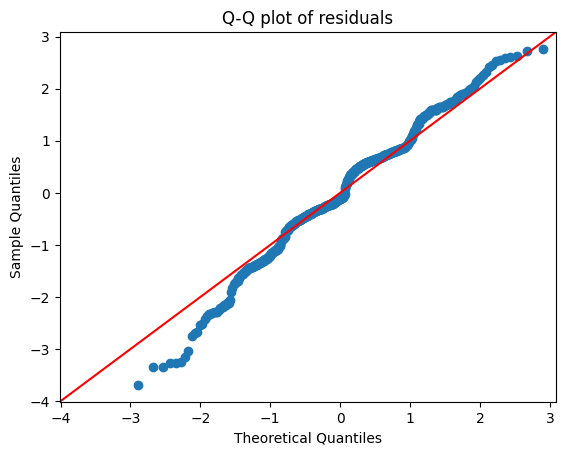

In [51]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='45')
plt.title("Q-Q plot of residuals")
plt.show()

In [258]:
model5 = smf.ols('procedural_fairness ~ C(procedure_type)*educ + gender + age + income_level + location + ideology + econ_attitude', data=data).fit()
print(model5.summary())

                             OLS Regression Results                            
Dep. Variable:     procedural_fairness   R-squared:                       0.022
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     1.083
Date:                 Fri, 30 May 2025   Prob (F-statistic):              0.372
Time:                         20:44:12   Log-Likelihood:                -838.74
No. Observations:                  534   AIC:                             1701.
Df Residuals:                      522   BIC:                             1753.
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercep

In [259]:
from stargazer.stargazer import Stargazer

# Оберните model1 в список
stargazer = Stargazer([model5])
stargazer.title("Table: Results")
stargazer.covariate_order([
    'C(procedure_type)[T.1]', 
    'C(procedure_type)[T.2]',
    'C(procedure_type)[T.1]:educ', 
     'C(procedure_type)[T.2]:educ',
    'gender', 
    'age', 
    'educ', 
    'income_level', 
    'location', 
    'ideology', 
    'econ_attitude'
])
stargazer.title("Dependent variable: p_fairness, r__fairness, r_interest")
stargazer.show_model_numbers(False)

In [260]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
  \caption{Dependent variable: p_fairness, r__fairness, r_interest}
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable: procedural_fairness}} \
\cr \cline{2-2}
\hline \\[-1.8ex]
 C(procedure_type)[T.1] & -0.449$^{}$ \\
& (0.503) \\
 C(procedure_type)[T.2] & -0.415$^{}$ \\
& (0.496) \\
 C(procedure_type)[T.1]:educ & 0.074$^{}$ \\
& (0.122) \\
 C(procedure_type)[T.2]:educ & 0.092$^{}$ \\
& (0.122) \\
 gender & -0.101$^{}$ \\
& (0.105) \\
 age & -0.003$^{}$ \\
& (0.006) \\
 educ & -0.058$^{}$ \\
& (0.096) \\
 income_level & -0.096$^{}$ \\
& (0.066) \\
 location & -0.008$^{}$ \\
& (0.037) \\
 ideology & -0.033$^{}$ \\
& (0.031) \\
 econ_attitude & 0.069$^{**}$ \\
& (0.033) \\
\hline \\[-1.8ex]
 Observations & 534 \\
 $R^2$ & 0.022 \\
 Adjusted $R^2$ & 0.002 \\
 Residual Std. Error & 1.177 (df=522) \\
 F Statistic & 1.083$^{}$ (df=11; 522) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \mul

In [262]:
model6 = smf.ols('procedural_fairness ~ C(group)*educ + gender + age + income_level + location + ideology + econ_attitude', data=data).fit()
print(model6.summary())

                             OLS Regression Results                            
Dep. Variable:     procedural_fairness   R-squared:                       0.051
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     1.099
Date:                 Fri, 30 May 2025   Prob (F-statistic):              0.339
Time:                         20:51:53   Log-Likelihood:                -830.71
No. Observations:                  534   AIC:                             1713.
Df Residuals:                      508   BIC:                             1825.
Df Model:                           25                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.1

In [263]:
from stargazer.stargazer import Stargazer

# Оберните model1 в список
stargazer = Stargazer([model6])
stargazer.title("Table: Results")
stargazer.covariate_order([
    'C(group)[T.1]', 
    'C(group)[T.2]',
    'C(group)[T.3]', 
     'C(group)[T.4]',
     'C(group)[T.5]',
     'C(group)[T.6]', 
     'C(group)[T.7]', 
     'C(group)[T.8]', 
     'C(group)[T.9]', 
    'C(group)[T.1]:educ', 
    'C(group)[T.2]:educ',
    'C(group)[T.3]:educ', 
     'C(group)[T.4]:educ',
     'C(group)[T.5]:educ',
     'C(group)[T.6]:educ', 
     'C(group)[T.7]:educ', 
     'C(group)[T.8]:educ', 
     'C(group)[T.9]:educ', 
    'gender', 
    'age', 
    'educ', 
    'income_level', 
    'location', 
    'ideology', 
    'econ_attitude'
])
stargazer.title("Dependent variable: p_fairness, r__fairness, r_interest")
stargazer.show_model_numbers(False)

In [264]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
  \caption{Dependent variable: p_fairness, r__fairness, r_interest}
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable: procedural_fairness}} \
\cr \cline{2-2}
\hline \\[-1.8ex]
 C(group)[T.1] & 0.048$^{}$ \\
& (0.799) \\
 C(group)[T.2] & 0.622$^{}$ \\
& (0.960) \\
 C(group)[T.3] & -0.912$^{}$ \\
& (0.889) \\
 C(group)[T.4] & -0.421$^{}$ \\
& (0.861) \\
 C(group)[T.5] & -0.735$^{}$ \\
& (0.876) \\
 C(group)[T.6] & -0.650$^{}$ \\
& (0.830) \\
 C(group)[T.7] & -1.045$^{}$ \\
& (0.967) \\
 C(group)[T.8] & -0.195$^{}$ \\
& (0.887) \\
 C(group)[T.9] & 0.012$^{}$ \\
& (0.859) \\
 C(group)[T.1]:educ & 0.016$^{}$ \\
& (0.194) \\
 C(group)[T.2]:educ & -0.156$^{}$ \\
& (0.224) \\
 C(group)[T.3]:educ & 0.166$^{}$ \\
& (0.209) \\
 C(group)[T.4]:educ & 0.094$^{}$ \\
& (0.208) \\
 C(group)[T.5]:educ & 0.176$^{}$ \\
& (0.210) \\
 C(group)[T.6]:educ & 0.281$^{}$ \\
& (0.204) \\
 C(group)[T.7]:educ &

### H2 - Делиберативная модель демократии окажется: а) наиболее предпочтительной с точки зрения процедурной справедливости в целом; б) наиболее предпочтительна с точки зрения процедурной справедливости среди людей с высшим образованием, так как модель опирается на рациональную аргументацию .
### H2 - не подтвеждена

In [53]:
from scipy.stats import shapiro
residual = model.resid
stat, p = shapiro(residual)
print(f"Shapiro–Wilk test: stat={stat:.3f}, p-value={p:.3f}")

if p > 0.05:
    print("Распределение остатков не отличается от нормального (не отвергаем H0)")
else:
    print("Остатки не распределены нормально (отвергаем H0)")

Shapiro–Wilk test: stat=0.981, p-value=0.000
Остатки не распределены нормально (отвергаем H0)


In [54]:
from statsmodels.stats.diagnostic import het_breuschpagan


residual = model.resid
exo = model.model.exog  

# тест Бреуша–Пагана
bp_test = het_breuschpagan(residual, exo)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for name, value in zip(labels, bp_test):
    print(f"{name}: {value:.3f}")

Lagrange multiplier statistic: 16.516
p-value: 0.123
f-value: 1.515
f p-value: 0.122


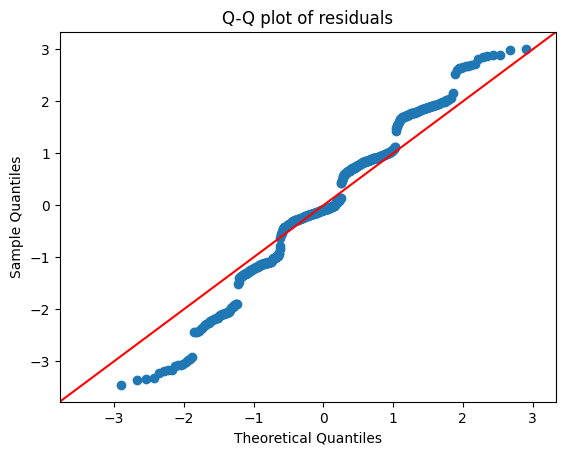

In [107]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residual, line='45')
plt.title("Q-Q plot of residuals")
plt.show()

### Гипотеза 2 - не подтверждена

In [55]:
import statsmodels.formula.api as smf
model2 = smf.ols('result_fairness ~ C(procedure_type) + gender + age + educ + income_level + location + ideology + econ_attitude', data=data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        result_fairness   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8061
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.611
Time:                        13:28:00   Log-Likelihood:                -897.77
No. Observations:                 534   AIC:                             1816.
Df Residuals:                     524   BIC:                             1858.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [56]:
from scipy.stats import shapiro
residual = model2.resid
stat, p = shapiro(residual)
print(f"Shapiro–Wilk test: stat={stat:.3f}, p-value={p:.3f}")

if p > 0.05:
    print("Распределение остатков не отличается от нормального (не отвергаем H0)")
else:
    print("Остатки не распределены нормально (отвергаем H0)")

Shapiro–Wilk test: stat=0.981, p-value=0.000
Остатки не распределены нормально (отвергаем H0)


In [178]:
from statsmodels.stats.diagnostic import het_breuschpagan


residual2 = model2.resid
exo = model2.model.exog  

# тест Бреуша–Пагана
bp_test = het_breuschpagan(residual, exo)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for name, value in zip(labels, bp_test):
    print(f"{name}: {value:.3f}")

Lagrange multiplier statistic: 6.066
p-value: 0.733
f-value: 0.669
f p-value: 0.737


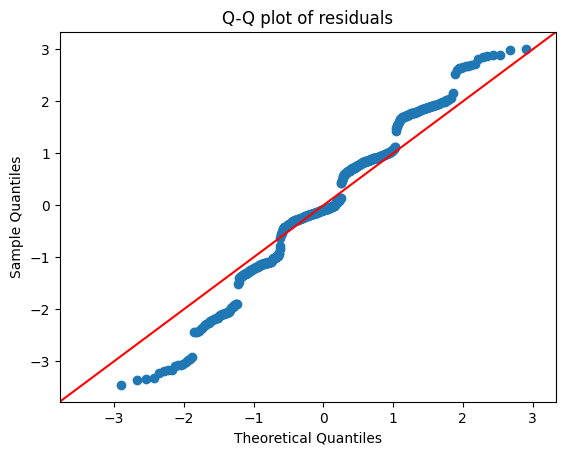

In [179]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residual2, line='45')
plt.title("Q-Q plot of residuals")
plt.show()

In [279]:
import statsmodels.formula.api as smf
model7 = smf.ols('result_fairness ~ C(group) + gender + age + educ + income_level + location + ideology + econ_attitude', data=data).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:        result_fairness   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.700
Date:                Fri, 30 May 2025   Prob (F-statistic):             0.0431
Time:                        21:57:51   Log-Likelihood:                -887.75
No. Observations:                 534   AIC:                             1810.
Df Residuals:                     517   BIC:                             1882.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.1268      0.529      7.795

In [280]:
from statsmodels.stats.diagnostic import het_breuschpagan


residual2 = model7.resid
exo = model7.model.exog  


bp_test = het_breuschpagan(residual, exo)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for name, value in zip(labels, bp_test):
    print(f"{name}: {value:.3f}")

Lagrange multiplier statistic: 11.726
p-value: 0.763
f-value: 0.725
f p-value: 0.769


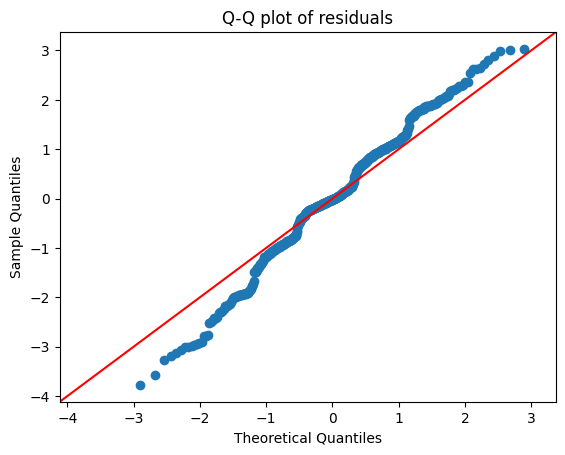

In [281]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residual2, line='45')
plt.title("Q-Q plot of residuals")
plt.show()

In [266]:
from stargazer.stargazer import Stargazer

stargazer = Stargazer([model7])
stargazer.title("Table: Results")
stargazer.covariate_order([
    'C(group)[T.1]', 
    'C(group)[T.2]',
    'C(group)[T.3]', 
     'C(group)[T.4]',
     'C(group)[T.5]',
     'C(group)[T.6]', 
     'C(group)[T.7]', 
     'C(group)[T.8]', 
     'C(group)[T.9]', 
    'gender', 
    'age', 
    'educ', 
    'income_level', 
    'location', 
    'ideology', 
    'econ_attitude'
])
stargazer.title("Dependent variable: p_fairness, r__fairness, r_interest")
stargazer.show_model_numbers(False)

In [267]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
  \caption{Dependent variable: p_fairness, r__fairness, r_interest}
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable: result_fairness}} \
\cr \cline{2-2}
\hline \\[-1.8ex]
 C(group)[T.1] & 0.316$^{}$ \\
& (0.239) \\
 C(group)[T.2] & 0.068$^{}$ \\
& (0.256) \\
 C(group)[T.3] & -0.185$^{}$ \\
& (0.249) \\
 C(group)[T.4] & 0.303$^{}$ \\
& (0.257) \\
 C(group)[T.5] & 0.046$^{}$ \\
& (0.245) \\
 C(group)[T.6] & 0.791$^{***}$ \\
& (0.259) \\
 C(group)[T.7] & -0.111$^{}$ \\
& (0.252) \\
 C(group)[T.8] & 0.036$^{}$ \\
& (0.252) \\
 C(group)[T.9] & 0.088$^{}$ \\
& (0.257) \\
 gender & -0.026$^{}$ \\
& (0.117) \\
 age & 0.001$^{}$ \\
& (0.006) \\
 educ & -0.013$^{}$ \\
& (0.054) \\
 income_level & -0.066$^{}$ \\
& (0.073) \\
 location & 0.015$^{}$ \\
& (0.041) \\
 ideology & -0.016$^{}$ \\
& (0.034) \\
 econ_attitude & 0.058$^{}$ \\
& (0.037) \\
\hline \\[-1.8ex]
 Observations & 534 \\
 $R^2

In [269]:
from statsmodels.stats.diagnostic import het_breuschpagan


residual7 = model7.resid
exo = model7.model.exog  


bp_test = het_breuschpagan(residual, exo)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for name, value in zip(labels, bp_test):
    print(f"{name}: {value:.3f}")

Lagrange multiplier statistic: 11.726
p-value: 0.763
f-value: 0.725
f p-value: 0.769


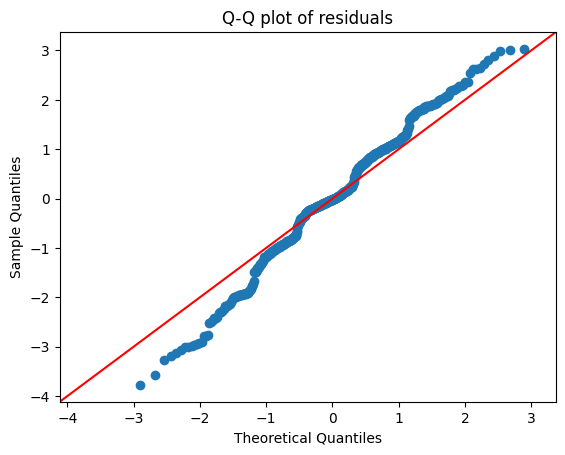

In [270]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residual7, line='45')
plt.title("Q-Q plot of residuals")
plt.show()

### Гипотеза 3 - по сравнению одной контрольной и двух экспериментальных - не подтверждена

In [59]:
import statsmodels.formula.api as smf
model = smf.ols('result_interest ~ C(procedure_type) + gender + age + educ + income_level + location + ideology + econ_attitude', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        result_interest   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.458
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.160
Time:                        13:28:00   Log-Likelihood:                -919.56
No. Observations:                 534   AIC:                             1859.
Df Residuals:                     524   BIC:                             1902.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

In [276]:
import statsmodels.formula.api as smf
model8 = smf.ols('result_interest ~ C(group) + gender + age + educ + income_level + location + ideology + econ_attitude', data=data).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:        result_interest   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.140
Date:                Fri, 30 May 2025   Prob (F-statistic):            0.00616
Time:                        21:49:24   Log-Likelihood:                -909.05
No. Observations:                 534   AIC:                             1852.
Df Residuals:                     517   BIC:                             1925.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.1908      0.551      9.421

In [277]:
from stargazer.stargazer import Stargazer


stargazer = Stargazer([model8])
stargazer.title("Table: Results")
stargazer.covariate_order([
    'C(group)[T.1]', 
    'C(group)[T.2]',
    'C(group)[T.3]', 
     'C(group)[T.4]',
     'C(group)[T.5]',
     'C(group)[T.6]', 
     'C(group)[T.7]', 
     'C(group)[T.8]', 
     'C(group)[T.9]', 
    'gender', 
    'age', 
    'educ', 
    'income_level', 
    'location', 
    'ideology', 
    'econ_attitude'
])
stargazer.title("Dependent variable: p_fairness, r__fairness, r_interest")
stargazer.show_model_numbers(False)

In [278]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
  \caption{Dependent variable: p_fairness, r__fairness, r_interest}
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable: result_interest}} \
\cr \cline{2-2}
\hline \\[-1.8ex]
 C(group)[T.1] & 0.490$^{**}$ \\
& (0.249) \\
 C(group)[T.2] & 0.321$^{}$ \\
& (0.266) \\
 C(group)[T.3] & -0.249$^{}$ \\
& (0.259) \\
 C(group)[T.4] & 0.424$^{}$ \\
& (0.268) \\
 C(group)[T.5] & 0.274$^{}$ \\
& (0.254) \\
 C(group)[T.6] & 0.763$^{***}$ \\
& (0.270) \\
 C(group)[T.7] & 0.041$^{}$ \\
& (0.263) \\
 C(group)[T.8] & 0.227$^{}$ \\
& (0.262) \\
 C(group)[T.9] & 0.054$^{}$ \\
& (0.268) \\
 gender & -0.056$^{}$ \\
& (0.122) \\
 age & -0.008$^{}$ \\
& (0.006) \\
 educ & -0.051$^{}$ \\
& (0.056) \\
 income_level & -0.098$^{}$ \\
& (0.076) \\
 location & -0.095$^{**}$ \\
& (0.042) \\
 ideology & -0.024$^{}$ \\
& (0.036) \\
 econ_attitude & 0.011$^{}$ \\
& (0.038) \\
\hline \\[-1.8ex]
 Observations & 534 \\


#### Гипотеза 4 - подтверждена, наличие демократической инновации положительно влияет на субъективную оценку интереса к результату

#### Попробуем рассмотреть иные взаимодействия, чтобы подтвердить гипотезы:

In [138]:

data_no_control = data[~data['group'].isin([0, 1])].copy() 

data_no_control.rename(columns=lambda x: x.strip(), inplace=True)


data_no_control["posititve_pp_agreement"] = 0
data_no_control.loc[
    (data_no_control["parliament_decision"] == 1) & 
    (data_no_control["public_parliament_agreement"] == 1),
    "posititve_pp_agreement"
] = 1

In [148]:
import statsmodels.formula.api as smf
model1 = smf.ols('procedural_fairness ~ C(procedure_type) + gender + age + educ + income_level + location + ideology + econ_attitude + posititve_pp_agreement*C(procedure_type) + econ_attitude*C(procedure_type)', data=data_no_control).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     procedural_fairness   R-squared:                       0.049
Model:                             OLS   Adj. R-squared:                  0.023
Method:                  Least Squares   F-statistic:                     1.884
Date:                 Thu, 29 May 2025   Prob (F-statistic):             0.0398
Time:                         00:50:07   Log-Likelihood:                -637.97
No. Observations:                  413   AIC:                             1300.
Df Residuals:                      401   BIC:                             1348.
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [152]:
import statsmodels.formula.api as smf
model1 = smf.ols('procedural_fairness ~ + gender + age + educ + income_level + location + ideology + econ_attitude + posititve_pp_agreement*C(procedure_type)', data=data_no_control).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     procedural_fairness   R-squared:                       0.049
Model:                             OLS   Adj. R-squared:                  0.025
Method:                  Least Squares   F-statistic:                     2.063
Date:                 Thu, 29 May 2025   Prob (F-statistic):             0.0264
Time:                         11:04:05   Log-Likelihood:                -638.04
No. Observations:                  413   AIC:                             1298.
Df Residuals:                      402   BIC:                             1342.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Вывод: с помощью взаимодействия согласованности парламента и граждан + сравнения экспериментальных групп друг с другом на уровне значимости ниже 0.1 и на грани с 0.05 -> в группе с процедурой типа 2 (агонистическая группа), при наличии согласия с решением парламента и общественным согласием, наблюдается рост справедливости на ~0.5 балла по сравнению с делиберативной демократией.

Мы можем говорить о том, что респонденты видят значимые различия в оценке процедурной справедливости между двумя моделями.

In [157]:
#тест на мультиколлинеарность (если меньше 10, то все окей)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import pandas as pd
y, X = dmatrices(
    'procedural_fairness ~ gender + age + educ + income_level + location + ideology + econ_attitude + posititve_pp_agreement*C(procedure_type)', 
    data=data_no_control, 
    return_type='dataframe'
)

# Вычисление VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                          feature        VIF
0                                       Intercept  76.900903
1                          C(procedure_type)[T.2]   1.400211
2                                          gender   1.056164
3                                             age   1.197044
4                                            educ   1.090519
5                                    income_level   1.043186
6                                        location   1.038985
7                                        ideology   1.069026
8                                   econ_attitude   1.070271
9                          posititve_pp_agreement   2.114938
10  posititve_pp_agreement:C(procedure_type)[T.2]   2.478775


In [150]:
import statsmodels.formula.api as smf
model1 = smf.ols('procedural_fairness ~ procedure_type*posititve_pp_agreement + gender + age + educ + income_level + location + ideology + econ_attitude', data = data).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     procedural_fairness   R-squared:                       0.035
Model:                             OLS   Adj. R-squared:                  0.017
Method:                  Least Squares   F-statistic:                     1.911
Date:                 Thu, 29 May 2025   Prob (F-statistic):             0.0414
Time:                         00:50:37   Log-Likelihood:                -835.18
No. Observations:                  534   AIC:                             1692.
Df Residuals:                      523   BIC:                             1739.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [273]:
import statsmodels.formula.api as smf
model1 = smf.ols('result_fairness ~ + gender + age + educ + income_level + location + ideology + econ_attitude + posititve_pp_agreement*C(procedure_type)', data=data_no_control).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        result_fairness   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2.656
Date:                Fri, 30 May 2025   Prob (F-statistic):            0.00377
Time:                        21:33:03   Log-Likelihood:                -678.23
No. Observations:                 413   AIC:                             1378.
Df Residuals:                     402   BIC:                             1423.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Гипотеза о снижении предпочтительности агонистической модели (процедуры 2) не подтверждается на уровне 0.05. Напротив, результаты показывают, что при наличии восприятия общественного согласия с решением, процедура 2 повышает оценку справедливости результата. Это может свидетельствовать о том, что даже в условиях поляризации и дебатов, характерных для агонистической демократии, результат воспринимается как справедливый — возможно, за счёт открытости конфликта, большей вовлечённости или представления различных точек зрения.

In [274]:
from stargazer.stargazer import Stargazer

# Оберните model1 в список
stargazer = Stargazer([model1])
stargazer.title("Table: Results")
stargazer.covariate_order([
    'C(procedure_type)[T.2]', 
    'posititve_pp_agreement',
    'posititve_pp_agreement:C(procedure_type)[T.2]', 
    'gender', 
    'age', 
    'educ', 
    'income_level', 
    'location', 
    'ideology', 
    'econ_attitude'
])
stargazer.title("Dependent variable: p_fairness, r__fairness, r_interest")
stargazer.show_model_numbers(False)

In [275]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
  \caption{Dependent variable: p_fairness, r__fairness, r_interest}
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable: result_fairness}} \
\cr \cline{2-2}
\hline \\[-1.8ex]
 C(procedure_type)[T.2] & -0.024$^{}$ \\
& (0.148) \\
 posititve_pp_agreement & 0.005$^{}$ \\
& (0.212) \\
 posititve_pp_agreement:C(procedure_type)[T.2] & 0.780$^{***}$ \\
& (0.296) \\
 gender & -0.031$^{}$ \\
& (0.129) \\
 age & 0.004$^{}$ \\
& (0.007) \\
 educ & -0.030$^{}$ \\
& (0.060) \\
 income_level & -0.119$^{}$ \\
& (0.079) \\
 location & 0.019$^{}$ \\
& (0.046) \\
 ideology & -0.019$^{}$ \\
& (0.038) \\
 econ_attitude & 0.091$^{**}$ \\
& (0.041) \\
\hline \\[-1.8ex]
 Observations & 413 \\
 $R^2$ & 0.062 \\
 Adjusted $R^2$ & 0.039 \\
 Residual Std. Error & 1.267 (df=402) \\
 F Statistic & 2.656$^{***}$ (df=10; 402) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$

In [255]:
import statsmodels.formula.api as smf
model1 = smf.ols('procedural_fairness ~ + gender + age + educ + income_level + location + ideology + econ_attitude + posititve_pp_agreement*C(procedure_type)', data=data_no_control).fit()
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     procedural_fairness   R-squared:                       0.049
Model:                             OLS   Adj. R-squared:                  0.025
Method:                  Least Squares   F-statistic:                     2.063
Date:                 Fri, 30 May 2025   Prob (F-statistic):             0.0264
Time:                         20:41:31   Log-Likelihood:                -638.04
No. Observations:                  413   AIC:                             1298.
Df Residuals:                      402   BIC:                             1342.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

### Ординальная логистическая регрессия

In [61]:
import numpy as np
import pandas as pd
import scipy.stats as stats

from statsmodels.miscmodels.ordinal_model import OrderedModel

In [62]:
data

,procedural_fairness,group,econ_attitude,ideology,gender,age,educ,income_level,location,result_fairness,result_interest,parliament_decision,procedure_type,public_parliament_agreement
0,6,1,1,4,2,26,3,3,3,6,7,1,0,0
1,5,1,4,4,2,29,5,4,4,3,3,1,0,0
2,7,1,4,5,2,36,2,3,2,7,7,1,0,0
3,3,1,6,5,1,27,5,4,2,3,3,1,0,0
4,6,1,2,1,1,52,5,3,4,4,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,6,9,6,7,1,22,3,4,2,6,6,0,2,1
530,5,9,1,7,1,35,5,4,2,3,3,0,2,1
531,4,9,4,5,1,50,3,3,2,4,4,0,2,1
532,5,9,1,4,2,31,5,3,2,6,5,0,2,1


In [63]:
X = data[[ 'procedure_type' , 'econ_attitude' , 'ideology' , 'gender', 'age', 'income_level', 'location']]   
y = data[ 'procedural_fairness' ] 

In [64]:
cross_tab = pd.crosstab(
    index=[X['procedure_type'], X['econ_attitude'], X['ideology'], X['gender'], X['age'], X['income_level']],
    columns=X['location']
)
print(cross_tab)

location                                                       1  2  3  4  5  \
procedure_type econ_attitude ideology gender age income_level                  
0              1             1        1      33  4             0  1  0  0  0   
                                      2      33  3             0  1  0  0  0   
                                             36  2             0  1  0  0  0   
                                             40  3             0  0  0  1  0   
                             3        2      56  2             0  0  0  1  0   
...                                                           .. .. .. .. ..   
2              7             7        1      28  2             0  1  0  0  0   
                                             33  4             0  0  0  0  1   
                                             52  3             0  0  0  1  0   
                                      2      31  4             1  0  0  0  0   
                                        

In [245]:
import patsy
from statsmodels.miscmodels.ordinal_model import OrderedModel

formula = 'C(group) + ideology + gender + age + income_level + location+econ_attitude'

# Построение X и y
y, X = patsy.dmatrices('procedural_fairness ~ ' + formula, data, return_type='dataframe')

X = X.loc[:, ~X.columns.sr.contains('Intercept')]  

# Построение модели
model = OrderedModel(endog=y, exog=X, distr='logit')  
result = model.fit(method='bfgs', disp=False)
print(result.summary())

                              OrderedModel Results                             
Dep. Variable:     procedural_fairness   Log-Likelihood:                -827.84
Model:                    OrderedModel   AIC:                             1698.
Method:             Maximum Likelihood   BIC:                             1788.
Date:                 Fri, 30 May 2025                                         
Time:                         20:10:59                                         
No. Observations:                  534                                         
Df Residuals:                      513                                         
Df Model:                           15                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
C(group)[T.1]     0.1952      0.337      0.580      0.562      -0.464       0.855
C(group)[T.2]    -0.0921      0.35

In [247]:
import pandas as pd


params = result.params
bse = result.bse
pvalues = result.pvalues

df = pd.DataFrame({
    'coef': params,
    'std_err': bse,
    'p_value': pvalues
})


def stars(p):
    if p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.1:
        return '*'
    else:
        return ''

df['signif'] = df['p_value'].apply(stars)


df['coef_se'] = df.apply(lambda row: f"{row['coef']:.3f}{row['signif']} ({row['std_err']:.3f})", axis=1)


print(df[['coef_se']].to_latex(header=True))

\begin{tabular}{ll}
\toprule
 & coef_se \\
\midrule
C(group)[T.1] & 0.195 (0.337) \\
C(group)[T.2] & -0.092 (0.353) \\
C(group)[T.3] & -0.348 (0.344) \\
C(group)[T.4] & -0.101 (0.352) \\
C(group)[T.5] & 0.002 (0.343) \\
C(group)[T.6] & 0.668* (0.367) \\
C(group)[T.7] & -0.077 (0.356) \\
C(group)[T.8] & -0.042 (0.343) \\
C(group)[T.9] & -0.166 (0.359) \\
ideology & -0.045 (0.047) \\
gender & -0.181 (0.163) \\
age & 0.002 (0.009) \\
income_level & -0.160 (0.100) \\
location & 0.004 (0.057) \\
econ_attitude & 0.082 (0.051) \\
1.0/2.0 & -4.816*** (0.779) \\
2.0/3.0 & 0.338 (0.221) \\
3.0/4.0 & 0.323*** (0.117) \\
4.0/5.0 & 0.425*** (0.068) \\
5.0/6.0 & 0.504*** (0.069) \\
6.0/7.0 & 0.549*** (0.130) \\
\bottomrule
\end{tabular}



### 6 группа продолжает влиять на уровне значимости 0.1

In [66]:
import patsy
from statsmodels.miscmodels.ordinal_model import OrderedModel

formula = 'C(procedure_type) + ideology + gender + age + income_level + location+econ_attitude'


y, X = patsy.dmatrices('procedural_fairness ~ ' + formula, data, return_type='dataframe')

X = X.loc[:, ~X.columns.str.contains('Intercept')]  


model = OrderedModel(endog=y, exog=X, distr='logit')  
result = model.fit(method='bfgs', disp=False)
print(result.summary())

                              OrderedModel Results                             
Dep. Variable:     procedural_fairness   Log-Likelihood:                -831.86
Model:                    OrderedModel   AIC:                             1692.
Method:             Maximum Likelihood   BIC:                             1752.
Date:                 Wed, 28 May 2025                                         
Time:                         13:28:00                                         
No. Observations:                  534                                         
Df Residuals:                      520                                         
Df Model:                            8                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(procedure_type)[T.1]    -0.2376      0.209     -1.136      0.256      -0.648       0.172
C(proce

In [282]:
import patsy
from statsmodels.miscmodels.ordinal_model import OrderedModel

formula = 'C(group) + ideology + gender + age + income_level + location+ econ_attitude'


y, X = patsy.dmatrices('result_fairness ~ ' + formula, data, return_type='dataframe')

X = X.loc[:, ~X.columns.str.contains('Intercept')]  


model = OrderedModel(endog=y, exog=X, distr='logit')  
result = model.fit(method='bfgs', disp=False)
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:        result_fairness   Log-Likelihood:                -878.50
Model:                   OrderedModel   AIC:                             1799.
Method:            Maximum Likelihood   BIC:                             1889.
Date:                Fri, 30 May 2025                                         
Time:                        22:12:13                                         
No. Observations:                 534                                         
Df Residuals:                     513                                         
Df Model:                          15                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
C(group)[T.1]     0.4990      0.336      1.483      0.138      -0.160       1.159
C(group)[T.2]     0.0462      0.357      0.

In [283]:
import pandas as pd


params = result.params
bse = result.bse
pvalues = result.pvalues

df = pd.DataFrame({
    'coef': params,
    'std_err': bse,
    'p_value': pvalues
})


def stars(p):
    if p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.1:
        return '*'
    else:
        return ''

df['signif'] = df['p_value'].apply(stars)


df['coef_se'] = df.apply(lambda row: f"{row['coef']:.3f}{row['signif']} ({row['std_err']:.3f})", axis=1)

print(df[['coef_se']].to_latex(header=True))

\begin{tabular}{ll}
\toprule
 & coef_se \\
\midrule
C(group)[T.1] & 0.499 (0.336) \\
C(group)[T.2] & 0.046 (0.357) \\
C(group)[T.3] & -0.207 (0.346) \\
C(group)[T.4] & 0.405 (0.353) \\
C(group)[T.5] & 0.090 (0.341) \\
C(group)[T.6] & 1.144*** (0.362) \\
C(group)[T.7] & -0.122 (0.352) \\
C(group)[T.8] & 0.086 (0.338) \\
C(group)[T.9] & 0.189 (0.355) \\
ideology & -0.019 (0.047) \\
gender & -0.055 (0.162) \\
age & 0.005 (0.009) \\
income_level & -0.112 (0.100) \\
location & 0.044 (0.056) \\
econ_attitude & 0.065 (0.050) \\
1.0/2.0 & -3.308*** (0.740) \\
2.0/3.0 & 0.323** (0.160) \\
3.0/4.0 & 0.115 (0.104) \\
4.0/5.0 & 0.376*** (0.067) \\
5.0/6.0 & 0.318*** (0.080) \\
6.0/7.0 & 0.571*** (0.132) \\
\bottomrule
\end{tabular}



In [271]:
import patsy
from statsmodels.miscmodels.ordinal_model import OrderedModel

formula = 'C(group) + ideology + gender + age + income_level + location + econ_attitude'


y, X = patsy.dmatrices('result_interest ~ ' + formula, data, return_type='dataframe')

X = X.loc[:, ~X.columns.str.contains('Intercept')]  


model = OrderedModel(endog=y, exog=X, distr='logit')  
result = model.fit(method='bfgs', disp=False)
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:        result_interest   Log-Likelihood:                -897.65
Model:                   OrderedModel   AIC:                             1837.
Method:            Maximum Likelihood   BIC:                             1927.
Date:                Fri, 30 May 2025                                         
Time:                        21:16:09                                         
No. Observations:                 534                                         
Df Residuals:                     513                                         
Df Model:                          15                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
C(group)[T.1]     0.7547      0.328      2.300      0.021       0.112       1.398
C(group)[T.2]     0.4286      0.344      1.

In [272]:
import pandas as pd


params = result.params
bse = result.bse
pvalues = result.pvalues

df = pd.DataFrame({
    'coef': params,
    'std_err': bse,
    'p_value': pvalues
})


def stars(p):
    if p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.1:
        return '*'
    else:
        return ''

df['signif'] = df['p_value'].apply(stars)


df['coef_se'] = df.apply(lambda row: f"{row['coef']:.3f}{row['signif']} ({row['std_err']:.3f})", axis=1)


print(df[['coef_se']].to_latex(header=True))

\begin{tabular}{ll}
\toprule
 & coef_se \\
\midrule
C(group)[T.1] & 0.755** (0.328) \\
C(group)[T.2] & 0.429 (0.344) \\
C(group)[T.3] & -0.240 (0.341) \\
C(group)[T.4] & 0.616* (0.353) \\
C(group)[T.5] & 0.473 (0.335) \\
C(group)[T.6] & 1.117*** (0.360) \\
C(group)[T.7] & 0.024 (0.342) \\
C(group)[T.8] & 0.359 (0.341) \\
C(group)[T.9] & 0.234 (0.349) \\
ideology & -0.042 (0.047) \\
gender & -0.099 (0.160) \\
age & -0.007 (0.009) \\
income_level & -0.135 (0.098) \\
location & -0.116** (0.056) \\
econ_attitude & 0.001 (0.050) \\
1.0/2.0 & -4.412*** (0.736) \\
2.0/3.0 & 0.278* (0.156) \\
3.0/4.0 & 0.114 (0.102) \\
4.0/5.0 & 0.277*** (0.071) \\
5.0/6.0 & 0.378*** (0.077) \\
6.0/7.0 & 0.212 (0.136) \\
\bottomrule
\end{tabular}



In [131]:
import patsy
from statsmodels.miscmodels.ordinal_model import OrderedModel


formula = 'C(group)+ ideology + gender + age + income_level + location + econ_attitude'

y = data['procedural_fairness']

_, X = patsy.dmatrices('procedural_fairness ~ ' + formula, data, return_type='dataframe')
X = X.loc[:, ~X.columns.str.contains('Intercept')]  # убираем intercept

X = X.loc[:, ~X.columns.str.contains('Intercept')]


model = OrderedModel(endog=y, exog=X, distr='logit')
result = model.fit(method='bfgs', disp=False)
print(result.summary())

                              OrderedModel Results                             
Dep. Variable:     procedural_fairness   Log-Likelihood:                -827.84
Model:                    OrderedModel   AIC:                             1698.
Method:             Maximum Likelihood   BIC:                             1788.
Date:                 Thu, 29 May 2025                                         
Time:                         00:33:19                                         
No. Observations:                  534                                         
Df Residuals:                      513                                         
Df Model:                           15                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
C(group)[T.1]     0.1952      0.337      0.580      0.562      -0.464       0.855
C(group)[T.2]    -0.0921      0.35